<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Again_Training_Exp01_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.MD
* Try Again, Fin...Fin...Fin...!!
* Original Kingma's VAE to Malimg
    * optimizer learning rate: 1e-3
    * optimizer params: sum 
* Add 
    * train, test loss plot
    * save model's state dict

* ✅ Check Point
    * Just try it again...!
* Reference repository: https://github.com/pytorch/examples/tree/master/vae

In [1]:
! nvidia-smi

Thu Jul  2 00:53:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd drive/My\ Drive/InfoSec_Summer_part2
! pwd

/content/drive/My Drive/InfoSec_Summer_part2
/content/drive/My Drive/InfoSec_Summer_part2


In [5]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [6]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])
# trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
#                                             transforms = transform)
trainset = torchvision.datasets.ImageFolder(root='../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

In [7]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [8]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [9]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

In [10]:
# for idx, (data, _) in enumerate(train_loader):
#     print(data[3], data[4], data.type(), data.shape)
#     print(_, _.type())
#     print("==" * 20 )

In [11]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [12]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([22,  2,  2,  3,  3,  2,  3, 24, 17,  2,  5,  3,  3, 12,  3,  2])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
VB.AT Allaple.A Allaple.A Allaple.L Allaple.L Allaple.A Allaple.L Yuner.A Obfuscator.AD Allaple.A Autorun.K Allaple.L Allaple.L Lolyda.AA1 Allaple.L Allaple.A 


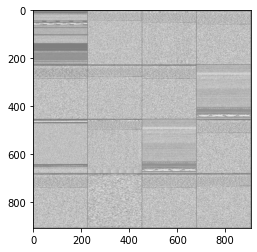

In [13]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

In [14]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [15]:
model = VAE().to(device)
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [16]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [17]:
# track and save train, test loss through Dictionary
# 
Epoch_Loss = {'train_epoch':[],
              'train_loss':[],
              'test_epoch':[],
              'test_loss':[]}

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html
PATH = '/Again_original_Exp01_200-Epoch.pth'

In [18]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='sum')  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    Epoch_Loss['train_epoch'].append(epoch)
    Epoch_Loss['train_loss'].append(train_loss / len(train_loader.dataset))
    torch.save(model.state_dict(), PATH)

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(16, 1, 224, 224)[:n]])
                save_image(comparison.cpu(),
                         './results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))



1
Train Epoch: 1 [0/7471 (0%)]	Loss: 35141.878906
Train Epoch: 1 [160/7471 (2%)]	Loss: 39890.832031
Train Epoch: 1 [320/7471 (4%)]	Loss: 39655.687500
Train Epoch: 1 [480/7471 (6%)]	Loss: 38071.109375
Train Epoch: 1 [640/7471 (9%)]	Loss: 39114.289062
Train Epoch: 1 [800/7471 (11%)]	Loss: 37619.277344
Train Epoch: 1 [960/7471 (13%)]	Loss: 37245.578125
Train Epoch: 1 [1120/7471 (15%)]	Loss: 62724.335938
Train Epoch: 1 [1280/7471 (17%)]	Loss: 51807.328125
Train Epoch: 1 [1440/7471 (19%)]	Loss: 45249.226562
Train Epoch: 1 [1600/7471 (21%)]	Loss: 51681.648438
Train Epoch: 1 [1760/7471 (24%)]	Loss: 79450.750000
Train Epoch: 1 [1920/7471 (26%)]	Loss: 158876.015625
Train Epoch: 1 [2080/7471 (28%)]	Loss: 68792.062500
Train Epoch: 1 [2240/7471 (30%)]	Loss: 51877.121094
Train Epoch: 1 [2400/7471 (32%)]	Loss: 44802.535156
Train Epoch: 1 [2560/7471 (34%)]	Loss: 43913.691406
Train Epoch: 1 [2720/7471 (36%)]	Loss: 42177.984375
Train Epoch: 1 [2880/7471 (39%)]	Loss: 42077.382812
Train Epoch: 1 [3040/74

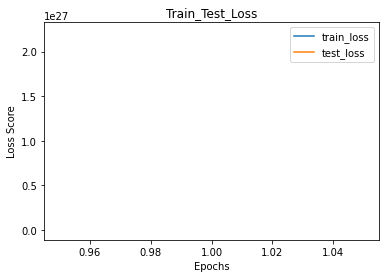

2
Train Epoch: 2 [0/7471 (0%)]	Loss: 38073204736.000000
Train Epoch: 2 [160/7471 (2%)]	Loss: 25981159424.000000
Train Epoch: 2 [320/7471 (4%)]	Loss: 23357491200.000000
Train Epoch: 2 [480/7471 (6%)]	Loss: 25517150208.000000
Train Epoch: 2 [640/7471 (9%)]	Loss: 25415526400.000000
Train Epoch: 2 [800/7471 (11%)]	Loss: 1222676123222016.000000
Train Epoch: 2 [960/7471 (13%)]	Loss: 28647553024.000000
Train Epoch: 2 [1120/7471 (15%)]	Loss: 33901260800.000000
Train Epoch: 2 [1280/7471 (17%)]	Loss: 36062236672.000000
Train Epoch: 2 [1440/7471 (19%)]	Loss: 19380348928.000000
Train Epoch: 2 [1600/7471 (21%)]	Loss: 23386048512.000000
Train Epoch: 2 [1760/7471 (24%)]	Loss: 1516308004864000.000000
Train Epoch: 2 [1920/7471 (26%)]	Loss: 33553037312.000000
Train Epoch: 2 [2080/7471 (28%)]	Loss: 22075140096.000000
Train Epoch: 2 [2240/7471 (30%)]	Loss: 40217378816.000000
Train Epoch: 2 [2400/7471 (32%)]	Loss: 57921527808.000000
Train Epoch: 2 [2560/7471 (34%)]	Loss: 32716378112.000000
Train Epoch: 2 [

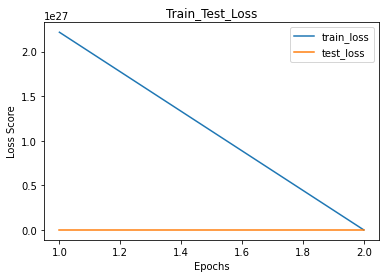

3
Train Epoch: 3 [0/7471 (0%)]	Loss: 83917.781250
Train Epoch: 3 [160/7471 (2%)]	Loss: 230049.312500
Train Epoch: 3 [320/7471 (4%)]	Loss: 605074.250000
Train Epoch: 3 [480/7471 (6%)]	Loss: 296227.750000
Train Epoch: 3 [640/7471 (9%)]	Loss: 2736488302452342620422144.000000
Train Epoch: 3 [800/7471 (11%)]	Loss: 5307508486404778754048.000000
Train Epoch: 3 [960/7471 (13%)]	Loss: 149220.312500
Train Epoch: 3 [1120/7471 (15%)]	Loss: 10608376640338981080268800.000000
Train Epoch: 3 [1280/7471 (17%)]	Loss: 72542.687500
Train Epoch: 3 [1440/7471 (19%)]	Loss: 1372931353603150446592000.000000
Train Epoch: 3 [1600/7471 (21%)]	Loss: 78606.804688
Train Epoch: 3 [1760/7471 (24%)]	Loss: 99366.234375
Train Epoch: 3 [1920/7471 (26%)]	Loss: 131219.656250
Train Epoch: 3 [2080/7471 (28%)]	Loss: 62187.570312
Train Epoch: 3 [2240/7471 (30%)]	Loss: 101642.656250
Train Epoch: 3 [2400/7471 (32%)]	Loss: 89522741996993815112883109888.000000
Train Epoch: 3 [2560/7471 (34%)]	Loss: 61603.070312
Train Epoch: 3 [2720

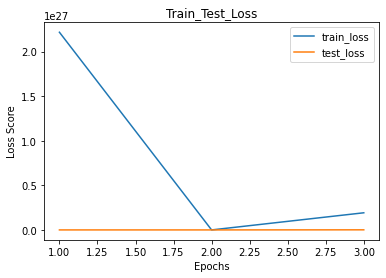

4
Train Epoch: 4 [0/7471 (0%)]	Loss: 60646.351562
Train Epoch: 4 [160/7471 (2%)]	Loss: 89522741996993815112883109888.000000
Train Epoch: 4 [320/7471 (4%)]	Loss: 60489.929688
Train Epoch: 4 [480/7471 (6%)]	Loss: 60238.605469
Train Epoch: 4 [640/7471 (9%)]	Loss: 60069.539062
Train Epoch: 4 [800/7471 (11%)]	Loss: 737113734671736124735488.000000
Train Epoch: 4 [960/7471 (13%)]	Loss: 61949.730469
Train Epoch: 4 [1120/7471 (15%)]	Loss: 59107.410156
Train Epoch: 4 [1280/7471 (17%)]	Loss: 60177.183594
Train Epoch: 4 [1440/7471 (19%)]	Loss: 10717741621344481977565184.000000
Train Epoch: 4 [1600/7471 (21%)]	Loss: 59021.292969
Train Epoch: 4 [1760/7471 (24%)]	Loss: 246835562151936.000000
Train Epoch: 4 [1920/7471 (26%)]	Loss: 1043687258594929016832.000000
Train Epoch: 4 [2080/7471 (28%)]	Loss: 5193214446211510042624.000000
Train Epoch: 4 [2240/7471 (30%)]	Loss: 59412.390625
Train Epoch: 4 [2400/7471 (32%)]	Loss: 59831.234375
Train Epoch: 4 [2560/7471 (34%)]	Loss: 2917684040189740056576000.000000


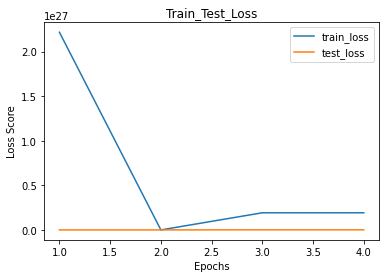

5
Train Epoch: 5 [0/7471 (0%)]	Loss: 58445.257812
Train Epoch: 5 [160/7471 (2%)]	Loss: 58742.003906
Train Epoch: 5 [320/7471 (4%)]	Loss: 59567.640625
Train Epoch: 5 [480/7471 (6%)]	Loss: 60258.101562
Train Epoch: 5 [640/7471 (9%)]	Loss: 62676.011719
Train Epoch: 5 [800/7471 (11%)]	Loss: 61657.402344
Train Epoch: 5 [960/7471 (13%)]	Loss: 60826.296875
Train Epoch: 5 [1120/7471 (15%)]	Loss: 64287.210938
Train Epoch: 5 [1280/7471 (17%)]	Loss: 60305.714844
Train Epoch: 5 [1440/7471 (19%)]	Loss: 60941.164062
Train Epoch: 5 [1600/7471 (21%)]	Loss: 60335.550781
Train Epoch: 5 [1760/7471 (24%)]	Loss: 1451979.250000
Train Epoch: 5 [1920/7471 (26%)]	Loss: 61431.585938
Train Epoch: 5 [2080/7471 (28%)]	Loss: 61424.882812
Train Epoch: 5 [2240/7471 (30%)]	Loss: 59968.148438
Train Epoch: 5 [2400/7471 (32%)]	Loss: 4000564410470216471937024.000000
Train Epoch: 5 [2560/7471 (34%)]	Loss: 60897.406250
Train Epoch: 5 [2720/7471 (36%)]	Loss: 82978.070312
Train Epoch: 5 [2880/7471 (39%)]	Loss: 69223.546875
Tr

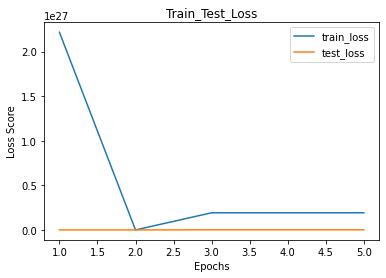

6
Train Epoch: 6 [0/7471 (0%)]	Loss: 3213366324486478156005376.000000
Train Epoch: 6 [160/7471 (2%)]	Loss: 62077.324219
Train Epoch: 6 [320/7471 (4%)]	Loss: 112933.070312
Train Epoch: 6 [480/7471 (6%)]	Loss: 75920.687500
Train Epoch: 6 [640/7471 (9%)]	Loss: 69851.265625
Train Epoch: 6 [800/7471 (11%)]	Loss: 66890.398438
Train Epoch: 6 [960/7471 (13%)]	Loss: 66393.445312
Train Epoch: 6 [1120/7471 (15%)]	Loss: 64390.015625
Train Epoch: 6 [1280/7471 (17%)]	Loss: 64961.414062
Train Epoch: 6 [1440/7471 (19%)]	Loss: 63034.593750
Train Epoch: 6 [1600/7471 (21%)]	Loss: 63274.480469
Train Epoch: 6 [1760/7471 (24%)]	Loss: 62134.414062
Train Epoch: 6 [1920/7471 (26%)]	Loss: 61019.273438
Train Epoch: 6 [2080/7471 (28%)]	Loss: 64240.773438
Train Epoch: 6 [2240/7471 (30%)]	Loss: 64518.082031
Train Epoch: 6 [2400/7471 (32%)]	Loss: 65575.398438
Train Epoch: 6 [2560/7471 (34%)]	Loss: 61013.750000
Train Epoch: 6 [2720/7471 (36%)]	Loss: 64718.082031
Train Epoch: 6 [2880/7471 (39%)]	Loss: 62965.816406
Tra

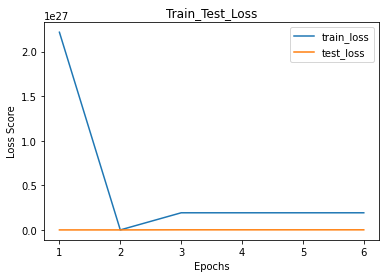

7
Train Epoch: 7 [0/7471 (0%)]	Loss: 79868.203125
Train Epoch: 7 [160/7471 (2%)]	Loss: 66398.984375
Train Epoch: 7 [320/7471 (4%)]	Loss: 69468.484375
Train Epoch: 7 [480/7471 (6%)]	Loss: 1391205303566357047017472.000000
Train Epoch: 7 [640/7471 (9%)]	Loss: 61625.128906
Train Epoch: 7 [800/7471 (11%)]	Loss: 63752.656250
Train Epoch: 7 [960/7471 (13%)]	Loss: 61688.800781
Train Epoch: 7 [1120/7471 (15%)]	Loss: 63695.460938
Train Epoch: 7 [1280/7471 (17%)]	Loss: 63417.347656
Train Epoch: 7 [1440/7471 (19%)]	Loss: 3425471935050181246976.000000
Train Epoch: 7 [1600/7471 (21%)]	Loss: 64966.046875
Train Epoch: 7 [1760/7471 (24%)]	Loss: 44546603612997490311168.000000
Train Epoch: 7 [1920/7471 (26%)]	Loss: 62984.191406
Train Epoch: 7 [2080/7471 (28%)]	Loss: 61687.507812
Train Epoch: 7 [2240/7471 (30%)]	Loss: 61582.703125
Train Epoch: 7 [2400/7471 (32%)]	Loss: 64386.363281
Train Epoch: 7 [2560/7471 (34%)]	Loss: 63220.679688
Train Epoch: 7 [2720/7471 (36%)]	Loss: 1650669279371811427975168.000000
T

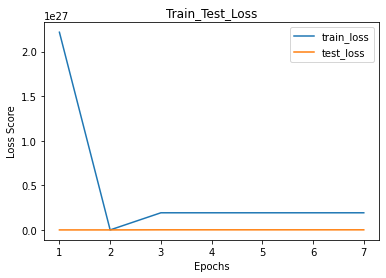

8
Train Epoch: 8 [0/7471 (0%)]	Loss: 61694.945312
Train Epoch: 8 [160/7471 (2%)]	Loss: 10608377793260485687115776.000000
Train Epoch: 8 [320/7471 (4%)]	Loss: 67841.906250
Train Epoch: 8 [480/7471 (6%)]	Loss: 66928.171875
Train Epoch: 8 [640/7471 (9%)]	Loss: 62422.734375
Train Epoch: 8 [800/7471 (11%)]	Loss: 63603.015625
Train Epoch: 8 [960/7471 (13%)]	Loss: 63327.273438
Train Epoch: 8 [1120/7471 (15%)]	Loss: 222873237639385631948800.000000
Train Epoch: 8 [1280/7471 (17%)]	Loss: 63270.675781
Train Epoch: 8 [1440/7471 (19%)]	Loss: 62420.859375
Train Epoch: 8 [1600/7471 (21%)]	Loss: 231129.171875
Train Epoch: 8 [1760/7471 (24%)]	Loss: 85680.656250
Train Epoch: 8 [1920/7471 (26%)]	Loss: 160754.109375
Train Epoch: 8 [2080/7471 (28%)]	Loss: 96409.070312
Train Epoch: 8 [2240/7471 (30%)]	Loss: 92908.671875
Train Epoch: 8 [2400/7471 (32%)]	Loss: 79493.500000
Train Epoch: 8 [2560/7471 (34%)]	Loss: 80429.156250
Train Epoch: 8 [2720/7471 (36%)]	Loss: 69668.953125
Train Epoch: 8 [2880/7471 (39%)]	L

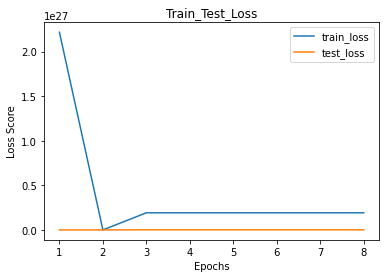

9
Train Epoch: 9 [0/7471 (0%)]	Loss: 61842.187500
Train Epoch: 9 [160/7471 (2%)]	Loss: 64889.984375
Train Epoch: 9 [320/7471 (4%)]	Loss: 64367.460938
Train Epoch: 9 [480/7471 (6%)]	Loss: 66742.937500
Train Epoch: 9 [640/7471 (9%)]	Loss: 65874.632812
Train Epoch: 9 [800/7471 (11%)]	Loss: 62272.804688
Train Epoch: 9 [960/7471 (13%)]	Loss: 60565.335938
Train Epoch: 9 [1120/7471 (15%)]	Loss: 62156.605469
Train Epoch: 9 [1280/7471 (17%)]	Loss: 2083443153938340487626752.000000
Train Epoch: 9 [1440/7471 (19%)]	Loss: 63570.781250
Train Epoch: 9 [1600/7471 (21%)]	Loss: 62050.257812
Train Epoch: 9 [1760/7471 (24%)]	Loss: 64507.031250
Train Epoch: 9 [1920/7471 (26%)]	Loss: 63084.945312
Train Epoch: 9 [2080/7471 (28%)]	Loss: 40121460772522950656.000000
Train Epoch: 9 [2240/7471 (30%)]	Loss: 64957.382812
Train Epoch: 9 [2400/7471 (32%)]	Loss: 64250.437500
Train Epoch: 9 [2560/7471 (34%)]	Loss: 77102.617188
Train Epoch: 9 [2720/7471 (36%)]	Loss: 68588.687500
Train Epoch: 9 [2880/7471 (39%)]	Loss: 89

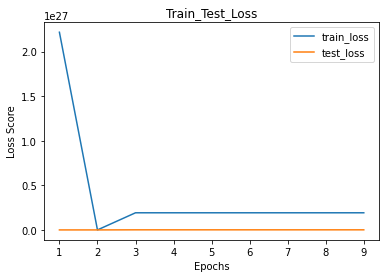

10
Train Epoch: 10 [0/7471 (0%)]	Loss: 73686.593750
Train Epoch: 10 [160/7471 (2%)]	Loss: 63317.210938
Train Epoch: 10 [320/7471 (4%)]	Loss: 64281.820312
Train Epoch: 10 [480/7471 (6%)]	Loss: 62419.847656
Train Epoch: 10 [640/7471 (9%)]	Loss: 6609640763375071067635712.000000
Train Epoch: 10 [800/7471 (11%)]	Loss: 63188.640625
Train Epoch: 10 [960/7471 (13%)]	Loss: 62642.875000
Train Epoch: 10 [1120/7471 (15%)]	Loss: 63726.101562
Train Epoch: 10 [1280/7471 (17%)]	Loss: 61178.078125
Train Epoch: 10 [1440/7471 (19%)]	Loss: 65430.656250
Train Epoch: 10 [1600/7471 (21%)]	Loss: 64013.968750
Train Epoch: 10 [1760/7471 (24%)]	Loss: 67165.781250
Train Epoch: 10 [1920/7471 (26%)]	Loss: 66943.781250
Train Epoch: 10 [2080/7471 (28%)]	Loss: 66806.937500
Train Epoch: 10 [2240/7471 (30%)]	Loss: 1403606991961036748226560.000000
Train Epoch: 10 [2400/7471 (32%)]	Loss: 677759092821961211904.000000
Train Epoch: 10 [2560/7471 (34%)]	Loss: 65267.835938
Train Epoch: 10 [2720/7471 (36%)]	Loss: 65146.460938
T

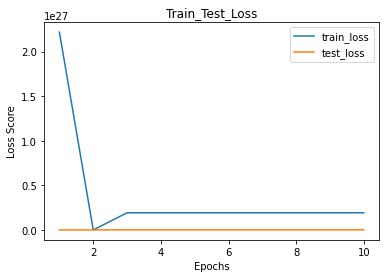

11
Train Epoch: 11 [0/7471 (0%)]	Loss: 65267.312500
Train Epoch: 11 [160/7471 (2%)]	Loss: 67909.617188
Train Epoch: 11 [320/7471 (4%)]	Loss: 62439.351562
Train Epoch: 11 [480/7471 (6%)]	Loss: 65204.539062
Train Epoch: 11 [640/7471 (9%)]	Loss: 66001.281250
Train Epoch: 11 [800/7471 (11%)]	Loss: 65572.343750
Train Epoch: 11 [960/7471 (13%)]	Loss: 287923.187500
Train Epoch: 11 [1120/7471 (15%)]	Loss: 7261488747021727065702400.000000
Train Epoch: 11 [1280/7471 (17%)]	Loss: 60206.960938
Train Epoch: 11 [1440/7471 (19%)]	Loss: 163022.625000
Train Epoch: 11 [1600/7471 (21%)]	Loss: 78038.671875
Train Epoch: 11 [1760/7471 (24%)]	Loss: 73814.867188
Train Epoch: 11 [1920/7471 (26%)]	Loss: 64103.578125
Train Epoch: 11 [2080/7471 (28%)]	Loss: 65142.867188
Train Epoch: 11 [2240/7471 (30%)]	Loss: 65136.546875
Train Epoch: 11 [2400/7471 (32%)]	Loss: 61821.085938
Train Epoch: 11 [2560/7471 (34%)]	Loss: 64386.601562
Train Epoch: 11 [2720/7471 (36%)]	Loss: 62511.796875
Train Epoch: 11 [2880/7471 (39%)]	L

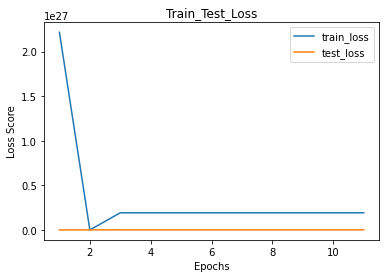

12
Train Epoch: 12 [0/7471 (0%)]	Loss: 63273.906250
Train Epoch: 12 [160/7471 (2%)]	Loss: 66829.703125
Train Epoch: 12 [320/7471 (4%)]	Loss: 3213366324486478156005376.000000
Train Epoch: 12 [480/7471 (6%)]	Loss: 68938.781250
Train Epoch: 12 [640/7471 (9%)]	Loss: 63844.476562
Train Epoch: 12 [800/7471 (11%)]	Loss: 65785.265625
Train Epoch: 12 [960/7471 (13%)]	Loss: 63602.097656
Train Epoch: 12 [1120/7471 (15%)]	Loss: 63382.804688
Train Epoch: 12 [1280/7471 (17%)]	Loss: 66827.554688
Train Epoch: 12 [1440/7471 (19%)]	Loss: 88428.906250
Train Epoch: 12 [1600/7471 (21%)]	Loss: 71574.046875
Train Epoch: 12 [1760/7471 (24%)]	Loss: 69994.375000
Train Epoch: 12 [1920/7471 (26%)]	Loss: 63040.164062
Train Epoch: 12 [2080/7471 (28%)]	Loss: 63101.902344
Train Epoch: 12 [2240/7471 (30%)]	Loss: 64373.960938
Train Epoch: 12 [2400/7471 (32%)]	Loss: 68565.015625
Train Epoch: 12 [2560/7471 (34%)]	Loss: 65508.117188
Train Epoch: 12 [2720/7471 (36%)]	Loss: 5620452352.000000
Train Epoch: 12 [2880/7471 (39%)

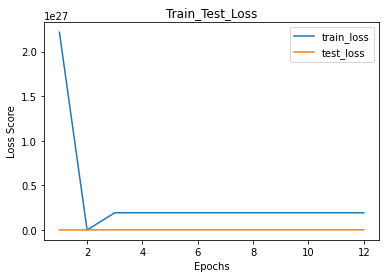

13
Train Epoch: 13 [0/7471 (0%)]	Loss: 62888.769531
Train Epoch: 13 [160/7471 (2%)]	Loss: 68486.625000
Train Epoch: 13 [320/7471 (4%)]	Loss: 63847.175781
Train Epoch: 13 [480/7471 (6%)]	Loss: 65327.765625
Train Epoch: 13 [640/7471 (9%)]	Loss: 66133.140625
Train Epoch: 13 [800/7471 (11%)]	Loss: 65292.824219
Train Epoch: 13 [960/7471 (13%)]	Loss: 7514821918611246462009344.000000
Train Epoch: 13 [1120/7471 (15%)]	Loss: 66658.343750
Train Epoch: 13 [1280/7471 (17%)]	Loss: 65154.089844
Train Epoch: 13 [1440/7471 (19%)]	Loss: 63529.871094
Train Epoch: 13 [1600/7471 (21%)]	Loss: 62000.296875
Train Epoch: 13 [1760/7471 (24%)]	Loss: 1073771353645359831187456.000000
Train Epoch: 13 [1920/7471 (26%)]	Loss: 26043305586967233691648.000000
Train Epoch: 13 [2080/7471 (28%)]	Loss: 170912.437500
Train Epoch: 13 [2240/7471 (30%)]	Loss: 78064.351562
Train Epoch: 13 [2400/7471 (32%)]	Loss: 71875.125000
Train Epoch: 13 [2560/7471 (34%)]	Loss: 67176.914062
Train Epoch: 13 [2720/7471 (36%)]	Loss: 65337.58984

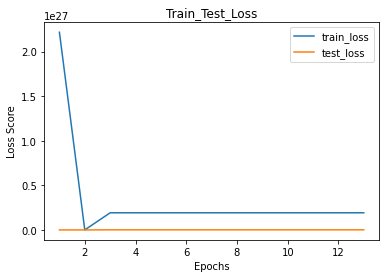

14
Train Epoch: 14 [0/7471 (0%)]	Loss: 10278607655297789246570496.000000
Train Epoch: 14 [160/7471 (2%)]	Loss: 66248.703125
Train Epoch: 14 [320/7471 (4%)]	Loss: 66770.179688
Train Epoch: 14 [480/7471 (6%)]	Loss: 65229.406250
Train Epoch: 14 [640/7471 (9%)]	Loss: 70100.906250
Train Epoch: 14 [800/7471 (11%)]	Loss: 65886.109375
Train Epoch: 14 [960/7471 (13%)]	Loss: 65877.648438
Train Epoch: 14 [1120/7471 (15%)]	Loss: 64526.210938
Train Epoch: 14 [1280/7471 (17%)]	Loss: 737113662614142086807552.000000
Train Epoch: 14 [1440/7471 (19%)]	Loss: 68860.937500
Train Epoch: 14 [1600/7471 (21%)]	Loss: 62539.437500
Train Epoch: 14 [1760/7471 (24%)]	Loss: 65786.531250
Train Epoch: 14 [1920/7471 (26%)]	Loss: 64921.144531
Train Epoch: 14 [2080/7471 (28%)]	Loss: 66781.531250
Train Epoch: 14 [2240/7471 (30%)]	Loss: 65013.500000
Train Epoch: 14 [2400/7471 (32%)]	Loss: 63413.265625
Train Epoch: 14 [2560/7471 (34%)]	Loss: 1073240577407676454010880.000000
Train Epoch: 14 [2720/7471 (36%)]	Loss: 6578902667

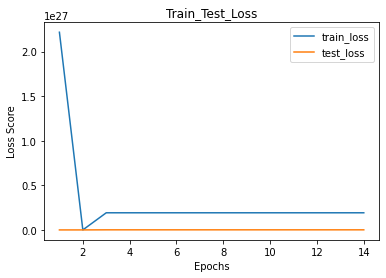

15
Train Epoch: 15 [0/7471 (0%)]	Loss: 67178.750000
Train Epoch: 15 [160/7471 (2%)]	Loss: 66251.765625
Train Epoch: 15 [320/7471 (4%)]	Loss: 67972.593750
Train Epoch: 15 [480/7471 (6%)]	Loss: 1521792631998813044736.000000
Train Epoch: 15 [640/7471 (9%)]	Loss: 65549.796875
Train Epoch: 15 [800/7471 (11%)]	Loss: 64797.773438
Train Epoch: 15 [960/7471 (13%)]	Loss: 64792.195312
Train Epoch: 15 [1120/7471 (15%)]	Loss: 65750.226562
Train Epoch: 15 [1280/7471 (17%)]	Loss: 63025.070312
Train Epoch: 15 [1440/7471 (19%)]	Loss: 66030.437500
Train Epoch: 15 [1600/7471 (21%)]	Loss: 617881.625000
Train Epoch: 15 [1760/7471 (24%)]	Loss: 249143.187500
Train Epoch: 15 [1920/7471 (26%)]	Loss: 126839.921875
Train Epoch: 15 [2080/7471 (28%)]	Loss: 80298.406250
Train Epoch: 15 [2240/7471 (30%)]	Loss: 10172414460430653587456.000000
Train Epoch: 15 [2400/7471 (32%)]	Loss: 69577.312500
Train Epoch: 15 [2560/7471 (34%)]	Loss: 68014.929688
Train Epoch: 15 [2720/7471 (36%)]	Loss: 68213.234375
Train Epoch: 15 [28

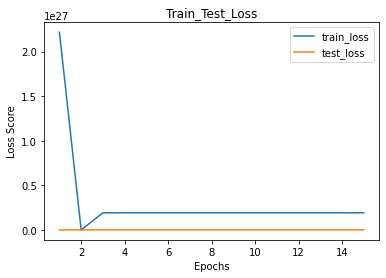

16
Train Epoch: 16 [0/7471 (0%)]	Loss: 67023.953125
Train Epoch: 16 [160/7471 (2%)]	Loss: 67861.812500
Train Epoch: 16 [320/7471 (4%)]	Loss: 65649.687500
Train Epoch: 16 [480/7471 (6%)]	Loss: 8141299288088276488945664.000000
Train Epoch: 16 [640/7471 (9%)]	Loss: 66472.101562
Train Epoch: 16 [800/7471 (11%)]	Loss: 2889998071408487385006080.000000
Train Epoch: 16 [960/7471 (13%)]	Loss: 64769.824219
Train Epoch: 16 [1120/7471 (15%)]	Loss: 64251.601562
Train Epoch: 16 [1280/7471 (17%)]	Loss: 62484.000000
Train Epoch: 16 [1440/7471 (19%)]	Loss: 284525544341504.000000
Train Epoch: 16 [1600/7471 (21%)]	Loss: 70658.960938
Train Epoch: 16 [1760/7471 (24%)]	Loss: 96722.046875
Train Epoch: 16 [1920/7471 (26%)]	Loss: 76951.906250
Train Epoch: 16 [2080/7471 (28%)]	Loss: 66363.906250
Train Epoch: 16 [2240/7471 (30%)]	Loss: 68099.632812
Train Epoch: 16 [2400/7471 (32%)]	Loss: 63922.781250
Train Epoch: 16 [2560/7471 (34%)]	Loss: 68047.835938
Train Epoch: 16 [2720/7471 (36%)]	Loss: 51599142676167791738

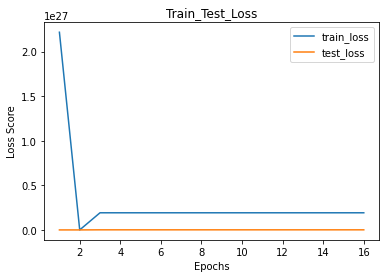

17
Train Epoch: 17 [0/7471 (0%)]	Loss: 74672.632812
Train Epoch: 17 [160/7471 (2%)]	Loss: 82990.750000
Train Epoch: 17 [320/7471 (4%)]	Loss: 94261.773438
Train Epoch: 17 [480/7471 (6%)]	Loss: 80003.617188
Train Epoch: 17 [640/7471 (9%)]	Loss: 160282.468750
Train Epoch: 17 [800/7471 (11%)]	Loss: 103701.171875
Train Epoch: 17 [960/7471 (13%)]	Loss: 250545.968750
Train Epoch: 17 [1120/7471 (15%)]	Loss: 42212090688555955781632.000000
Train Epoch: 17 [1280/7471 (17%)]	Loss: 95909.195312
Train Epoch: 17 [1440/7471 (19%)]	Loss: 75589.335938
Train Epoch: 17 [1600/7471 (21%)]	Loss: 72751.523438
Train Epoch: 17 [1760/7471 (24%)]	Loss: 67356.078125
Train Epoch: 17 [1920/7471 (26%)]	Loss: 66832.578125
Train Epoch: 17 [2080/7471 (28%)]	Loss: 3705171797701510842810368.000000
Train Epoch: 17 [2240/7471 (30%)]	Loss: 67117.500000
Train Epoch: 17 [2400/7471 (32%)]	Loss: 115298104219392081395712.000000
Train Epoch: 17 [2560/7471 (34%)]	Loss: 822573752970342505119744.000000
Train Epoch: 17 [2720/7471 (36%

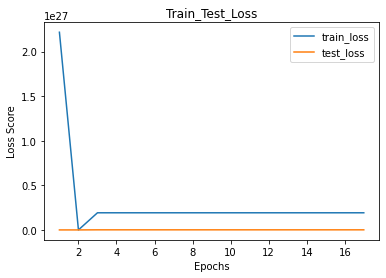

18
Train Epoch: 18 [0/7471 (0%)]	Loss: 66363.015625
Train Epoch: 18 [160/7471 (2%)]	Loss: 69698.000000
Train Epoch: 18 [320/7471 (4%)]	Loss: 66838.109375
Train Epoch: 18 [480/7471 (6%)]	Loss: 52720992721045502820352.000000
Train Epoch: 18 [640/7471 (9%)]	Loss: 70819.593750
Train Epoch: 18 [800/7471 (11%)]	Loss: 66541.968750
Train Epoch: 18 [960/7471 (13%)]	Loss: 69393.046875
Train Epoch: 18 [1120/7471 (15%)]	Loss: 66316.546875
Train Epoch: 18 [1280/7471 (17%)]	Loss: 4000564410470216471937024.000000
Train Epoch: 18 [1440/7471 (19%)]	Loss: 69112.085938
Train Epoch: 18 [1600/7471 (21%)]	Loss: 120231.335938
Train Epoch: 18 [1760/7471 (24%)]	Loss: 91257.421875
Train Epoch: 18 [1920/7471 (26%)]	Loss: 231386.203125
Train Epoch: 18 [2080/7471 (28%)]	Loss: 1063700.625000
Train Epoch: 18 [2240/7471 (30%)]	Loss: 422402.000000
Train Epoch: 18 [2400/7471 (32%)]	Loss: 169961.687500
Train Epoch: 18 [2560/7471 (34%)]	Loss: 101870.367188
Train Epoch: 18 [2720/7471 (36%)]	Loss: 75102.531250
Train Epoch:

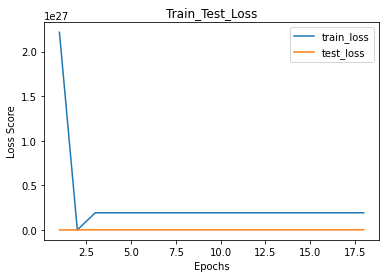

19
Train Epoch: 19 [0/7471 (0%)]	Loss: 2408601461767421464412160.000000
Train Epoch: 19 [160/7471 (2%)]	Loss: 64920.425781
Train Epoch: 19 [320/7471 (4%)]	Loss: 67027.218750
Train Epoch: 19 [480/7471 (6%)]	Loss: 65979.781250
Train Epoch: 19 [640/7471 (9%)]	Loss: 67836.546875
Train Epoch: 19 [800/7471 (11%)]	Loss: 66745.289062
Train Epoch: 19 [960/7471 (13%)]	Loss: 66967.578125
Train Epoch: 19 [1120/7471 (15%)]	Loss: 822573752970342505119744.000000
Train Epoch: 19 [1280/7471 (17%)]	Loss: 70484.250000
Train Epoch: 19 [1440/7471 (19%)]	Loss: 67392.148438
Train Epoch: 19 [1600/7471 (21%)]	Loss: 212429.078125
Train Epoch: 19 [1760/7471 (24%)]	Loss: 1102547193536436162789376.000000
Train Epoch: 19 [1920/7471 (26%)]	Loss: 71673.609375
Train Epoch: 19 [2080/7471 (28%)]	Loss: 11948619066406825518694400.000000
Train Epoch: 19 [2240/7471 (30%)]	Loss: 68126.531250
Train Epoch: 19 [2400/7471 (32%)]	Loss: 68565.734375
Train Epoch: 19 [2560/7471 (34%)]	Loss: 65879.929688
Train Epoch: 19 [2720/7471 (3

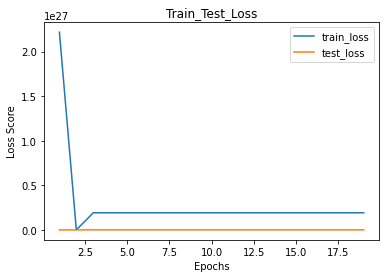

20
Train Epoch: 20 [0/7471 (0%)]	Loss: 194471.578125
Train Epoch: 20 [160/7471 (2%)]	Loss: 100260.343750
Train Epoch: 20 [320/7471 (4%)]	Loss: 99195.125000
Train Epoch: 20 [480/7471 (6%)]	Loss: 185267.390625
Train Epoch: 20 [640/7471 (9%)]	Loss: 892758.062500
Train Epoch: 20 [800/7471 (11%)]	Loss: 321569.312500
Train Epoch: 20 [960/7471 (13%)]	Loss: 128595.625000
Train Epoch: 20 [1120/7471 (15%)]	Loss: 4315913806253290470506496.000000
Train Epoch: 20 [1280/7471 (17%)]	Loss: 24920517667467122704384.000000
Train Epoch: 20 [1440/7471 (19%)]	Loss: 70308.648438
Train Epoch: 20 [1600/7471 (21%)]	Loss: 64020.878906
Train Epoch: 20 [1760/7471 (24%)]	Loss: 1352342725694161158144.000000
Train Epoch: 20 [1920/7471 (26%)]	Loss: 64951.660156
Train Epoch: 20 [2080/7471 (28%)]	Loss: 68592.890625
Train Epoch: 20 [2240/7471 (30%)]	Loss: 66412.375000
Train Epoch: 20 [2400/7471 (32%)]	Loss: 65984.101562
Train Epoch: 20 [2560/7471 (34%)]	Loss: 2089865503179752928706560.000000
Train Epoch: 20 [2720/7471 (3

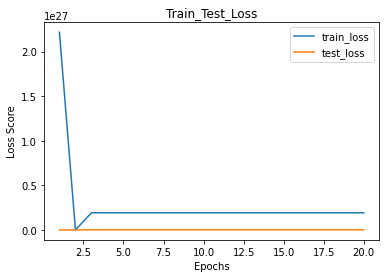

21
Train Epoch: 21 [0/7471 (0%)]	Loss: 65407.328125
Train Epoch: 21 [160/7471 (2%)]	Loss: 68165.023438
Train Epoch: 21 [320/7471 (4%)]	Loss: 1372931353603150446592000.000000
Train Epoch: 21 [480/7471 (6%)]	Loss: 120591.546875
Train Epoch: 21 [640/7471 (9%)]	Loss: 75859.312500
Train Epoch: 21 [800/7471 (11%)]	Loss: 149333.968750
Train Epoch: 21 [960/7471 (13%)]	Loss: 74064.125000
Train Epoch: 21 [1120/7471 (15%)]	Loss: 69910.328125
Train Epoch: 21 [1280/7471 (17%)]	Loss: 64743.847656
Train Epoch: 21 [1440/7471 (19%)]	Loss: 2408601461767421464412160.000000
Train Epoch: 21 [1600/7471 (21%)]	Loss: 65839.109375
Train Epoch: 21 [1760/7471 (24%)]	Loss: 10158783190258509938688.000000
Train Epoch: 21 [1920/7471 (26%)]	Loss: 4116331564590799190491136.000000
Train Epoch: 21 [2080/7471 (28%)]	Loss: 67053.890625
Train Epoch: 21 [2240/7471 (30%)]	Loss: 64233.679688
Train Epoch: 21 [2400/7471 (32%)]	Loss: 69699.406250
Train Epoch: 21 [2560/7471 (34%)]	Loss: 70690.562500
Train Epoch: 21 [2720/7471 (36

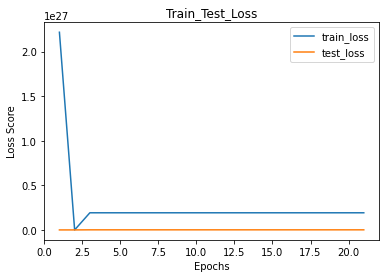

22
Train Epoch: 22 [0/7471 (0%)]	Loss: 70858.015625
Train Epoch: 22 [160/7471 (2%)]	Loss: 69193.195312
Train Epoch: 22 [320/7471 (4%)]	Loss: 66517.515625
Train Epoch: 22 [480/7471 (6%)]	Loss: 64309.335938
Train Epoch: 22 [640/7471 (9%)]	Loss: 7444349416001767473152.000000
Train Epoch: 22 [800/7471 (11%)]	Loss: 2869804020751350628352.000000
Train Epoch: 22 [960/7471 (13%)]	Loss: 63889.617188
Train Epoch: 22 [1120/7471 (15%)]	Loss: 66866.078125
Train Epoch: 22 [1280/7471 (17%)]	Loss: 66847.023438
Train Epoch: 22 [1440/7471 (19%)]	Loss: 67943.968750
Train Epoch: 22 [1600/7471 (21%)]	Loss: 69660.218750
Train Epoch: 22 [1760/7471 (24%)]	Loss: 69714.445312
Train Epoch: 22 [1920/7471 (26%)]	Loss: 139946.187500
Train Epoch: 22 [2080/7471 (28%)]	Loss: 4255443361567037498327040.000000
Train Epoch: 22 [2240/7471 (30%)]	Loss: 81104.093750
Train Epoch: 22 [2400/7471 (32%)]	Loss: 72820.593750
Train Epoch: 22 [2560/7471 (34%)]	Loss: 67634.875000
Train Epoch: 22 [2720/7471 (36%)]	Loss: 69872.289062
Tr

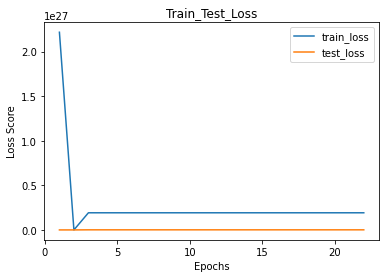

23
Train Epoch: 23 [0/7471 (0%)]	Loss: 69489.375000
Train Epoch: 23 [160/7471 (2%)]	Loss: 76710.390625
Train Epoch: 23 [320/7471 (4%)]	Loss: 67241.828125
Train Epoch: 23 [480/7471 (6%)]	Loss: 63325.671875
Train Epoch: 23 [640/7471 (9%)]	Loss: 2089865359064564852850688.000000
Train Epoch: 23 [800/7471 (11%)]	Loss: 65295.218750
Train Epoch: 23 [960/7471 (13%)]	Loss: 68054.296875
Train Epoch: 23 [1120/7471 (15%)]	Loss: 67148.968750
Train Epoch: 23 [1280/7471 (17%)]	Loss: 69325.953125
Train Epoch: 23 [1440/7471 (19%)]	Loss: 67378.875000
Train Epoch: 23 [1600/7471 (21%)]	Loss: 67200.218750
Train Epoch: 23 [1760/7471 (24%)]	Loss: 111544.781250
Train Epoch: 23 [1920/7471 (26%)]	Loss: 118920.226562
Train Epoch: 23 [2080/7471 (28%)]	Loss: 87184.484375
Train Epoch: 23 [2240/7471 (30%)]	Loss: 76628.468750
Train Epoch: 23 [2400/7471 (32%)]	Loss: 1960493587074433264123904.000000
Train Epoch: 23 [2560/7471 (34%)]	Loss: 68344.734375
Train Epoch: 23 [2720/7471 (36%)]	Loss: 67724.671875
Train Epoch: 23

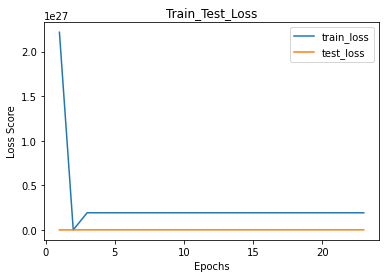

24
Train Epoch: 24 [0/7471 (0%)]	Loss: 1102547193536436162789376.000000
Train Epoch: 24 [160/7471 (2%)]	Loss: 67563.976562
Train Epoch: 24 [320/7471 (4%)]	Loss: 67366.101562
Train Epoch: 24 [480/7471 (6%)]	Loss: 65929.914062
Train Epoch: 24 [640/7471 (9%)]	Loss: 65126.085938
Train Epoch: 24 [800/7471 (11%)]	Loss: 647807426118573226983424.000000
Train Epoch: 24 [960/7471 (13%)]	Loss: 67624.578125
Train Epoch: 24 [1120/7471 (15%)]	Loss: 68364.546875
Train Epoch: 24 [1280/7471 (17%)]	Loss: 82145.296875
Train Epoch: 24 [1440/7471 (19%)]	Loss: 1506503362749752854708224.000000
Train Epoch: 24 [1600/7471 (21%)]	Loss: 79630.992188
Train Epoch: 24 [1760/7471 (24%)]	Loss: 169200.718750
Train Epoch: 24 [1920/7471 (26%)]	Loss: 116086.226562
Train Epoch: 24 [2080/7471 (28%)]	Loss: 81334.031250
Train Epoch: 24 [2240/7471 (30%)]	Loss: 71967.476562
Train Epoch: 24 [2400/7471 (32%)]	Loss: 65386.574219
Train Epoch: 24 [2560/7471 (34%)]	Loss: 69218.718750
Train Epoch: 24 [2720/7471 (36%)]	Loss: 69060.343

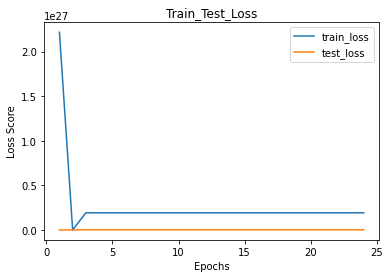

25
Train Epoch: 25 [0/7471 (0%)]	Loss: 66176.085938
Train Epoch: 25 [160/7471 (2%)]	Loss: 63311.148438
Train Epoch: 25 [320/7471 (4%)]	Loss: 67666.500000
Train Epoch: 25 [480/7471 (6%)]	Loss: 66333.179688
Train Epoch: 25 [640/7471 (9%)]	Loss: 64574.929688
Train Epoch: 25 [800/7471 (11%)]	Loss: 67557.500000
Train Epoch: 25 [960/7471 (13%)]	Loss: 62714.996094
Train Epoch: 25 [1120/7471 (15%)]	Loss: 86259.359375
Train Epoch: 25 [1280/7471 (17%)]	Loss: 72754.132812
Train Epoch: 25 [1440/7471 (19%)]	Loss: 73850.640625
Train Epoch: 25 [1600/7471 (21%)]	Loss: 125626.406250
Train Epoch: 25 [1760/7471 (24%)]	Loss: 85627.203125
Train Epoch: 25 [1920/7471 (26%)]	Loss: 2083443153938340487626752.000000
Train Epoch: 25 [2080/7471 (28%)]	Loss: 27691560985352470528.000000
Train Epoch: 25 [2240/7471 (30%)]	Loss: 65123.679688
Train Epoch: 25 [2400/7471 (32%)]	Loss: 67224.781250
Train Epoch: 25 [2560/7471 (34%)]	Loss: 6609641339835823371059200.000000
Train Epoch: 25 [2720/7471 (36%)]	Loss: 65242.859375
T

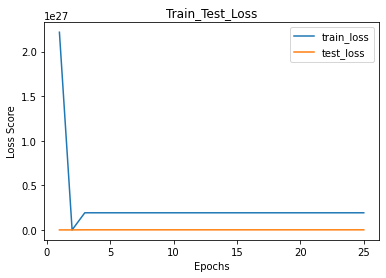

26
Train Epoch: 26 [0/7471 (0%)]	Loss: 65601.265625
Train Epoch: 26 [160/7471 (2%)]	Loss: 66087.226562
Train Epoch: 26 [320/7471 (4%)]	Loss: 222873237639385631948800.000000
Train Epoch: 26 [480/7471 (6%)]	Loss: 64923.250000
Train Epoch: 26 [640/7471 (9%)]	Loss: 67339.875000
Train Epoch: 26 [800/7471 (11%)]	Loss: 66146.257812
Train Epoch: 26 [960/7471 (13%)]	Loss: 67641.546875
Train Epoch: 26 [1120/7471 (15%)]	Loss: 66785.875000
Train Epoch: 26 [1280/7471 (17%)]	Loss: 62911.296875
Train Epoch: 26 [1440/7471 (19%)]	Loss: 67388.078125
Train Epoch: 26 [1600/7471 (21%)]	Loss: 66241.781250
Train Epoch: 26 [1760/7471 (24%)]	Loss: 65986.398438
Train Epoch: 26 [1920/7471 (26%)]	Loss: 62836.007812
Train Epoch: 26 [2080/7471 (28%)]	Loss: 64828.902344
Train Epoch: 26 [2240/7471 (30%)]	Loss: 105332.929688
Train Epoch: 26 [2400/7471 (32%)]	Loss: 67579.265625
Train Epoch: 26 [2560/7471 (34%)]	Loss: 67134.531250
Train Epoch: 26 [2720/7471 (36%)]	Loss: 67227.203125
Train Epoch: 26 [2880/7471 (39%)]	Los

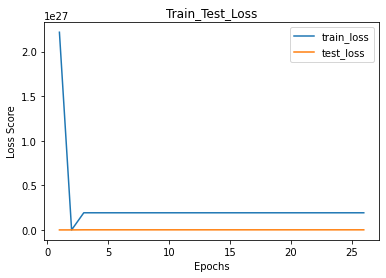

27
Train Epoch: 27 [0/7471 (0%)]	Loss: 1296034948010387573833728.000000
Train Epoch: 27 [160/7471 (2%)]	Loss: 66020.078125
Train Epoch: 27 [320/7471 (4%)]	Loss: 145569.718750
Train Epoch: 27 [480/7471 (6%)]	Loss: 7514849012266604722913280.000000
Train Epoch: 27 [640/7471 (9%)]	Loss: 91548.875000
Train Epoch: 27 [800/7471 (11%)]	Loss: 156655.781250
Train Epoch: 27 [960/7471 (13%)]	Loss: 87049.375000
Train Epoch: 27 [1120/7471 (15%)]	Loss: 73993.937500
Train Epoch: 27 [1280/7471 (17%)]	Loss: 70106.062500
Train Epoch: 27 [1440/7471 (19%)]	Loss: 68575.953125
Train Epoch: 27 [1600/7471 (21%)]	Loss: 66589.179688
Train Epoch: 27 [1760/7471 (24%)]	Loss: 66984.039062
Train Epoch: 27 [1920/7471 (26%)]	Loss: 65611.718750
Train Epoch: 27 [2080/7471 (28%)]	Loss: 64560.738281
Train Epoch: 27 [2240/7471 (30%)]	Loss: 66174.710938
Train Epoch: 27 [2400/7471 (32%)]	Loss: 65698.234375
Train Epoch: 27 [2560/7471 (34%)]	Loss: 4229544997578677742993408.000000
Train Epoch: 27 [2720/7471 (36%)]	Loss: 67492.75

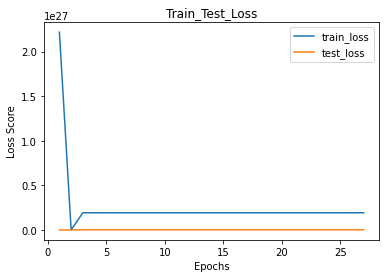

28
Train Epoch: 28 [0/7471 (0%)]	Loss: 62845.289062
Train Epoch: 28 [160/7471 (2%)]	Loss: 63154.699219
Train Epoch: 28 [320/7471 (4%)]	Loss: 61021.156250
Train Epoch: 28 [480/7471 (6%)]	Loss: 64691.074219
Train Epoch: 28 [640/7471 (9%)]	Loss: 66434.296875
Train Epoch: 28 [800/7471 (11%)]	Loss: 66575.343750
Train Epoch: 28 [960/7471 (13%)]	Loss: 67262.585938
Train Epoch: 28 [1120/7471 (15%)]	Loss: 67438.921875
Train Epoch: 28 [1280/7471 (17%)]	Loss: 65313.687500
Train Epoch: 28 [1440/7471 (19%)]	Loss: 63082.394531
Train Epoch: 28 [1600/7471 (21%)]	Loss: 65858.000000
Train Epoch: 28 [1760/7471 (24%)]	Loss: 66045.578125
Train Epoch: 28 [1920/7471 (26%)]	Loss: 66295.804688
Train Epoch: 28 [2080/7471 (28%)]	Loss: 66372.648438
Train Epoch: 28 [2240/7471 (30%)]	Loss: 66581.625000
Train Epoch: 28 [2400/7471 (32%)]	Loss: 66313.375000
Train Epoch: 28 [2560/7471 (34%)]	Loss: 66125.523438
Train Epoch: 28 [2720/7471 (36%)]	Loss: 66779.609375
Train Epoch: 28 [2880/7471 (39%)]	Loss: 63387.750000
Trai

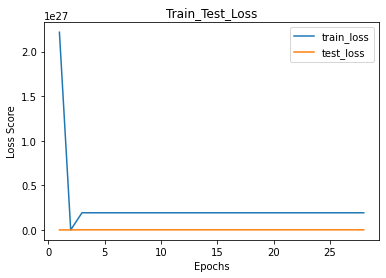

29
Train Epoch: 29 [0/7471 (0%)]	Loss: 65419.714844
Train Epoch: 29 [160/7471 (2%)]	Loss: 61380.414062
Train Epoch: 29 [320/7471 (4%)]	Loss: 89522741996993815112883109888.000000
Train Epoch: 29 [480/7471 (6%)]	Loss: 65386.613281
Train Epoch: 29 [640/7471 (9%)]	Loss: 64415.335938
Train Epoch: 29 [800/7471 (11%)]	Loss: 67219.328125
Train Epoch: 29 [960/7471 (13%)]	Loss: 75338.468750
Train Epoch: 29 [1120/7471 (15%)]	Loss: 114070.687500
Train Epoch: 29 [1280/7471 (17%)]	Loss: 76012.242188
Train Epoch: 29 [1440/7471 (19%)]	Loss: 183572.921875
Train Epoch: 29 [1600/7471 (21%)]	Loss: 100942.015625
Train Epoch: 29 [1760/7471 (24%)]	Loss: 706606.000000
Train Epoch: 29 [1920/7471 (26%)]	Loss: 4809639470234245860950016.000000
Train Epoch: 29 [2080/7471 (28%)]	Loss: 134624.625000
Train Epoch: 29 [2240/7471 (30%)]	Loss: 97493.429688
Train Epoch: 29 [2400/7471 (32%)]	Loss: 69817.218750
Train Epoch: 29 [2560/7471 (34%)]	Loss: 67084.703125
Train Epoch: 29 [2720/7471 (36%)]	Loss: 62266.765625
Train Ep

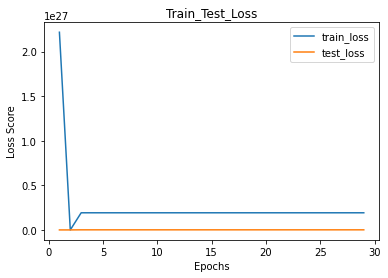

30
Train Epoch: 30 [0/7471 (0%)]	Loss: 67185.312500
Train Epoch: 30 [160/7471 (2%)]	Loss: 66233.390625
Train Epoch: 30 [320/7471 (4%)]	Loss: 65518.906250
Train Epoch: 30 [480/7471 (6%)]	Loss: 64926.191406
Train Epoch: 30 [640/7471 (9%)]	Loss: 65385.179688
Train Epoch: 30 [800/7471 (11%)]	Loss: 61321.285156
Train Epoch: 30 [960/7471 (13%)]	Loss: 63344.316406
Train Epoch: 30 [1120/7471 (15%)]	Loss: 64346.578125
Train Epoch: 30 [1280/7471 (17%)]	Loss: 65115.535156
Train Epoch: 30 [1440/7471 (19%)]	Loss: 9126420232926604034048.000000
Train Epoch: 30 [1600/7471 (21%)]	Loss: 65646.500000
Train Epoch: 30 [1760/7471 (24%)]	Loss: 64107.718750
Train Epoch: 30 [1920/7471 (26%)]	Loss: 474167151451608973312.000000
Train Epoch: 30 [2080/7471 (28%)]	Loss: 63588.218750
Train Epoch: 30 [2240/7471 (30%)]	Loss: 63425.070312
Train Epoch: 30 [2400/7471 (32%)]	Loss: 61639.328125
Train Epoch: 30 [2560/7471 (34%)]	Loss: 64304.414062
Train Epoch: 30 [2720/7471 (36%)]	Loss: 66185.125000
Train Epoch: 30 [2880/74

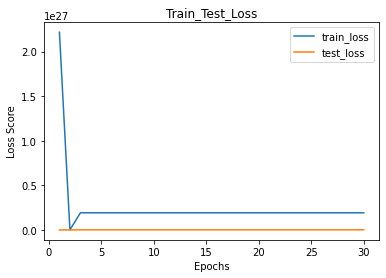

31
Train Epoch: 31 [0/7471 (0%)]	Loss: 66184.242188
Train Epoch: 31 [160/7471 (2%)]	Loss: 1154062.000000
Train Epoch: 31 [320/7471 (4%)]	Loss: 529412.125000
Train Epoch: 31 [480/7471 (6%)]	Loss: 122776.796875
Train Epoch: 31 [640/7471 (9%)]	Loss: 151387.562500
Train Epoch: 31 [800/7471 (11%)]	Loss: 89513.156250
Train Epoch: 31 [960/7471 (13%)]	Loss: 73427.164062
Train Epoch: 31 [1120/7471 (15%)]	Loss: 73243.234375
Train Epoch: 31 [1280/7471 (17%)]	Loss: 3055858223752356846108672.000000
Train Epoch: 31 [1440/7471 (19%)]	Loss: 65732.554688
Train Epoch: 31 [1600/7471 (21%)]	Loss: 65192.421875
Train Epoch: 31 [1760/7471 (24%)]	Loss: 64436.710938
Train Epoch: 31 [1920/7471 (26%)]	Loss: 66919.171875
Train Epoch: 31 [2080/7471 (28%)]	Loss: 2889998071408487385006080.000000
Train Epoch: 31 [2240/7471 (30%)]	Loss: 65689.984375
Train Epoch: 31 [2400/7471 (32%)]	Loss: 64376.390625
Train Epoch: 31 [2560/7471 (34%)]	Loss: 61834.398438
Train Epoch: 31 [2720/7471 (36%)]	Loss: 63088.492188
Train Epoch:

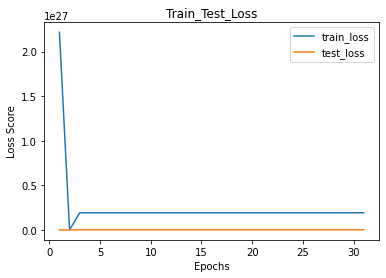

32
Train Epoch: 32 [0/7471 (0%)]	Loss: 4116331276360423038779392.000000
Train Epoch: 32 [160/7471 (2%)]	Loss: 62188.402344
Train Epoch: 32 [320/7471 (4%)]	Loss: 850434173186761000222720.000000
Train Epoch: 32 [480/7471 (6%)]	Loss: 62681.429688
Train Epoch: 32 [640/7471 (9%)]	Loss: 64067.781250
Train Epoch: 32 [800/7471 (11%)]	Loss: 63157.000000
Train Epoch: 32 [960/7471 (13%)]	Loss: 66325.578125
Train Epoch: 32 [1120/7471 (15%)]	Loss: 10717741621344481977565184.000000
Train Epoch: 32 [1280/7471 (17%)]	Loss: 64841.265625
Train Epoch: 32 [1440/7471 (19%)]	Loss: 2965204005845120468385792.000000
Train Epoch: 32 [1600/7471 (21%)]	Loss: 65457.359375
Train Epoch: 32 [1760/7471 (24%)]	Loss: 63640.882812
Train Epoch: 32 [1920/7471 (26%)]	Loss: 65190.804688
Train Epoch: 32 [2080/7471 (28%)]	Loss: 66399.445312
Train Epoch: 32 [2240/7471 (30%)]	Loss: 66024.234375
Train Epoch: 32 [2400/7471 (32%)]	Loss: 3680277340113287499481088.000000
Train Epoch: 32 [2560/7471 (34%)]	Loss: 63125.582031
Train Epoc

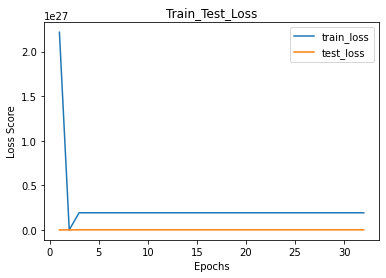

33
Train Epoch: 33 [0/7471 (0%)]	Loss: 4797403226075477242281984.000000
Train Epoch: 33 [160/7471 (2%)]	Loss: 68877.343750
Train Epoch: 33 [320/7471 (4%)]	Loss: 67269.562500
Train Epoch: 33 [480/7471 (6%)]	Loss: 64756.601562
Train Epoch: 33 [640/7471 (9%)]	Loss: 64677.738281
Train Epoch: 33 [800/7471 (11%)]	Loss: 68765.109375
Train Epoch: 33 [960/7471 (13%)]	Loss: 68501.218750
Train Epoch: 33 [1120/7471 (15%)]	Loss: 65785.609375
Train Epoch: 33 [1280/7471 (17%)]	Loss: 65731.593750
Train Epoch: 33 [1440/7471 (19%)]	Loss: 10608376640338981080268800.000000
Train Epoch: 33 [1600/7471 (21%)]	Loss: 67349.125000
Train Epoch: 33 [1760/7471 (24%)]	Loss: 65169.070312
Train Epoch: 33 [1920/7471 (26%)]	Loss: 62736.472656
Train Epoch: 33 [2080/7471 (28%)]	Loss: 64112.019531
Train Epoch: 33 [2240/7471 (30%)]	Loss: 143042989090970013794304.000000
Train Epoch: 33 [2400/7471 (32%)]	Loss: 69197.671875
Train Epoch: 33 [2560/7471 (34%)]	Loss: 3680277051882911347769344.000000
Train Epoch: 33 [2720/7471 (36

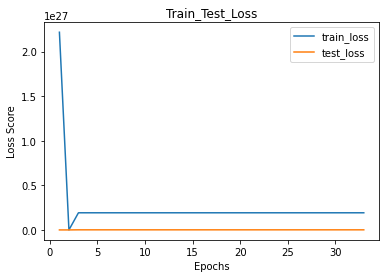

34
Train Epoch: 34 [0/7471 (0%)]	Loss: 67070.687500
Train Epoch: 34 [160/7471 (2%)]	Loss: 66190.804688
Train Epoch: 34 [320/7471 (4%)]	Loss: 68054.507812
Train Epoch: 34 [480/7471 (6%)]	Loss: 67703.859375
Train Epoch: 34 [640/7471 (9%)]	Loss: 67955.867188
Train Epoch: 34 [800/7471 (11%)]	Loss: 1073240577407676454010880.000000
Train Epoch: 34 [960/7471 (13%)]	Loss: 65753.195312
Train Epoch: 34 [1120/7471 (15%)]	Loss: 66723.500000
Train Epoch: 34 [1280/7471 (17%)]	Loss: 65787.796875
Train Epoch: 34 [1440/7471 (19%)]	Loss: 17351769587712.000000
Train Epoch: 34 [1600/7471 (21%)]	Loss: 496330690120614561185792.000000
Train Epoch: 34 [1760/7471 (24%)]	Loss: 65941.296875
Train Epoch: 34 [1920/7471 (26%)]	Loss: 65239.890625
Train Epoch: 34 [2080/7471 (28%)]	Loss: 62595.472656
Train Epoch: 34 [2240/7471 (30%)]	Loss: 66581.546875
Train Epoch: 34 [2400/7471 (32%)]	Loss: 64952.460938
Train Epoch: 34 [2560/7471 (34%)]	Loss: 1391205303566357047017472.000000
Train Epoch: 34 [2720/7471 (36%)]	Loss: 66

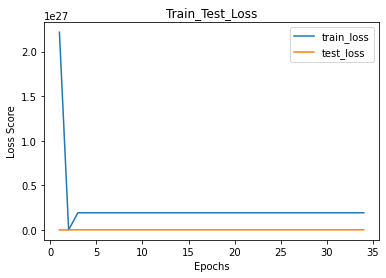

35
Train Epoch: 35 [0/7471 (0%)]	Loss: 66901.414062
Train Epoch: 35 [160/7471 (2%)]	Loss: 65019.171875
Train Epoch: 35 [320/7471 (4%)]	Loss: 115298104219392081395712.000000
Train Epoch: 35 [480/7471 (6%)]	Loss: 67391.625000
Train Epoch: 35 [640/7471 (9%)]	Loss: 5294234126503104217088.000000
Train Epoch: 35 [800/7471 (11%)]	Loss: 67711.609375
Train Epoch: 35 [960/7471 (13%)]	Loss: 67107.421875
Train Epoch: 35 [1120/7471 (15%)]	Loss: 65052.757812
Train Epoch: 35 [1280/7471 (17%)]	Loss: 10650588555387151568601088.000000
Train Epoch: 35 [1440/7471 (19%)]	Loss: 143042989090970013794304.000000
Train Epoch: 35 [1600/7471 (21%)]	Loss: 65096.656250
Train Epoch: 35 [1760/7471 (24%)]	Loss: 64591.921875
Train Epoch: 35 [1920/7471 (26%)]	Loss: 114386.203125
Train Epoch: 35 [2080/7471 (28%)]	Loss: 79962.328125
Train Epoch: 35 [2240/7471 (30%)]	Loss: 70203.203125
Train Epoch: 35 [2400/7471 (32%)]	Loss: 72550.765625
Train Epoch: 35 [2560/7471 (34%)]	Loss: 70376.367188
Train Epoch: 35 [2720/7471 (36%)]

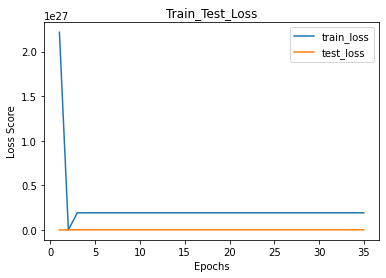

36
Train Epoch: 36 [0/7471 (0%)]	Loss: 67364.687500
Train Epoch: 36 [160/7471 (2%)]	Loss: 5963321966592.000000
Train Epoch: 36 [320/7471 (4%)]	Loss: 63741.492188
Train Epoch: 36 [480/7471 (6%)]	Loss: 67445.585938
Train Epoch: 36 [640/7471 (9%)]	Loss: 68605.140625
Train Epoch: 36 [800/7471 (11%)]	Loss: 65524.800781
Train Epoch: 36 [960/7471 (13%)]	Loss: 61145.789062
Train Epoch: 36 [1120/7471 (15%)]	Loss: 74536.484375
Train Epoch: 36 [1280/7471 (17%)]	Loss: 67292.468750
Train Epoch: 36 [1440/7471 (19%)]	Loss: 67362.664062
Train Epoch: 36 [1600/7471 (21%)]	Loss: 70207.531250
Train Epoch: 36 [1760/7471 (24%)]	Loss: 74420.546875
Train Epoch: 36 [1920/7471 (26%)]	Loss: 64362.078125
Train Epoch: 36 [2080/7471 (28%)]	Loss: 68300.367188
Train Epoch: 36 [2240/7471 (30%)]	Loss: 68411.843750
Train Epoch: 36 [2400/7471 (32%)]	Loss: 67353.195312
Train Epoch: 36 [2560/7471 (34%)]	Loss: 67037.156250
Train Epoch: 36 [2720/7471 (36%)]	Loss: 67837.265625
Train Epoch: 36 [2880/7471 (39%)]	Loss: 66438.484

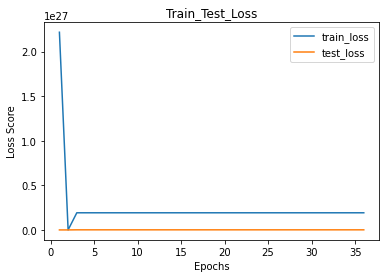

37
Train Epoch: 37 [0/7471 (0%)]	Loss: 67782.914062
Train Epoch: 37 [160/7471 (2%)]	Loss: 64059.773438
Train Epoch: 37 [320/7471 (4%)]	Loss: 11948619066406825518694400.000000
Train Epoch: 37 [480/7471 (6%)]	Loss: 66202.273438
Train Epoch: 37 [640/7471 (9%)]	Loss: 66884.320312
Train Epoch: 37 [800/7471 (11%)]	Loss: 63145.343750
Train Epoch: 37 [960/7471 (13%)]	Loss: 65076.523438
Train Epoch: 37 [1120/7471 (15%)]	Loss: 66926.085938
Train Epoch: 37 [1280/7471 (17%)]	Loss: 67254.179688
Train Epoch: 37 [1440/7471 (19%)]	Loss: 68913.703125
Train Epoch: 37 [1600/7471 (21%)]	Loss: 70174.390625
Train Epoch: 37 [1760/7471 (24%)]	Loss: 73984.484375
Train Epoch: 37 [1920/7471 (26%)]	Loss: 65818.703125
Train Epoch: 37 [2080/7471 (28%)]	Loss: 65834.921875
Train Epoch: 37 [2240/7471 (30%)]	Loss: 66724.343750
Train Epoch: 37 [2400/7471 (32%)]	Loss: 65469.597656
Train Epoch: 37 [2560/7471 (34%)]	Loss: 66352.406250
Train Epoch: 37 [2720/7471 (36%)]	Loss: 64658.746094
Train Epoch: 37 [2880/7471 (39%)]	Lo

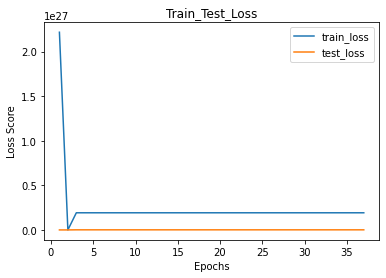

38
Train Epoch: 38 [0/7471 (0%)]	Loss: 8609407558654424514560.000000
Train Epoch: 38 [160/7471 (2%)]	Loss: 95633.429688
Train Epoch: 38 [320/7471 (4%)]	Loss: 75473.414062
Train Epoch: 38 [480/7471 (6%)]	Loss: 73035.156250
Train Epoch: 38 [640/7471 (9%)]	Loss: 70589.593750
Train Epoch: 38 [800/7471 (11%)]	Loss: 75201.000000
Train Epoch: 38 [960/7471 (13%)]	Loss: 77196.218750
Train Epoch: 38 [1120/7471 (15%)]	Loss: 496330690120614561185792.000000
Train Epoch: 38 [1280/7471 (17%)]	Loss: 66561.679688
Train Epoch: 38 [1440/7471 (19%)]	Loss: 67632.007812
Train Epoch: 38 [1600/7471 (21%)]	Loss: 63852.742188
Train Epoch: 38 [1760/7471 (24%)]	Loss: 67471.218750
Train Epoch: 38 [1920/7471 (26%)]	Loss: 67669.359375
Train Epoch: 38 [2080/7471 (28%)]	Loss: 67314.429688
Train Epoch: 38 [2240/7471 (30%)]	Loss: 67989.031250
Train Epoch: 38 [2400/7471 (32%)]	Loss: 68141.046875
Train Epoch: 38 [2560/7471 (34%)]	Loss: 69687.375000
Train Epoch: 38 [2720/7471 (36%)]	Loss: 68052.484375
Train Epoch: 38 [2880

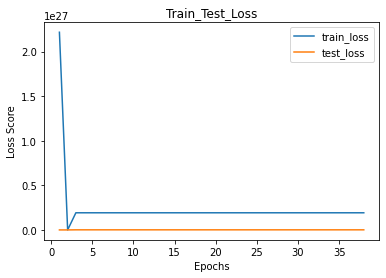

39
Train Epoch: 39 [0/7471 (0%)]	Loss: 67313.609375
Train Epoch: 39 [160/7471 (2%)]	Loss: 68675.289062
Train Epoch: 39 [320/7471 (4%)]	Loss: 71115.046875
Train Epoch: 39 [480/7471 (6%)]	Loss: 69073.250000
Train Epoch: 39 [640/7471 (9%)]	Loss: 112816.953125
Train Epoch: 39 [800/7471 (11%)]	Loss: 46194619335440058023936.000000
Train Epoch: 39 [960/7471 (13%)]	Loss: 74951.187500
Train Epoch: 39 [1120/7471 (15%)]	Loss: 72588.921875
Train Epoch: 39 [1280/7471 (17%)]	Loss: 99811.312500
Train Epoch: 39 [1440/7471 (19%)]	Loss: 1073240577407676454010880.000000
Train Epoch: 39 [1600/7471 (21%)]	Loss: 70039.531250
Train Epoch: 39 [1760/7471 (24%)]	Loss: 316655.875000
Train Epoch: 39 [1920/7471 (26%)]	Loss: 1252791600561158185025536.000000
Train Epoch: 39 [2080/7471 (28%)]	Loss: 98163.796875
Train Epoch: 39 [2240/7471 (30%)]	Loss: 86742.843750
Train Epoch: 39 [2400/7471 (32%)]	Loss: 73555.484375
Train Epoch: 39 [2560/7471 (34%)]	Loss: 69174.171875
Train Epoch: 39 [2720/7471 (36%)]	Loss: 2965204005

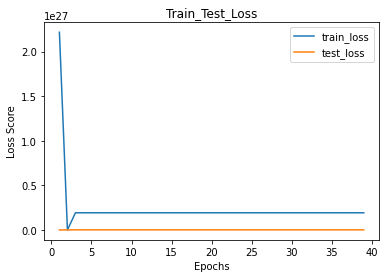

40
Train Epoch: 40 [0/7471 (0%)]	Loss: 66068.078125
Train Epoch: 40 [160/7471 (2%)]	Loss: 67724.765625
Train Epoch: 40 [320/7471 (4%)]	Loss: 64926.898438
Train Epoch: 40 [480/7471 (6%)]	Loss: 146873.000000
Train Epoch: 40 [640/7471 (9%)]	Loss: 114274.625000
Train Epoch: 40 [800/7471 (11%)]	Loss: 74588.406250
Train Epoch: 40 [960/7471 (13%)]	Loss: 106214.390625
Train Epoch: 40 [1120/7471 (15%)]	Loss: 76013.781250
Train Epoch: 40 [1280/7471 (17%)]	Loss: 1299628604340247115857920.000000
Train Epoch: 40 [1440/7471 (19%)]	Loss: 72403.203125
Train Epoch: 40 [1600/7471 (21%)]	Loss: 69936.570312
Train Epoch: 40 [1760/7471 (24%)]	Loss: 70314.601562
Train Epoch: 40 [1920/7471 (26%)]	Loss: 64066.960938
Train Epoch: 40 [2080/7471 (28%)]	Loss: 68835.445312
Train Epoch: 40 [2240/7471 (30%)]	Loss: 68703.812500
Train Epoch: 40 [2400/7471 (32%)]	Loss: 67060.046875
Train Epoch: 40 [2560/7471 (34%)]	Loss: 63768.214844
Train Epoch: 40 [2720/7471 (36%)]	Loss: 70231.093750
Train Epoch: 40 [2880/7471 (39%)]	

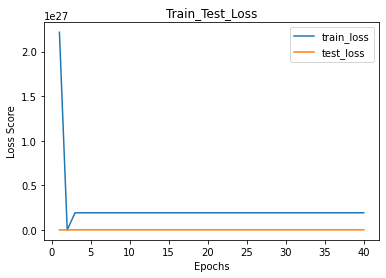

41
Train Epoch: 41 [0/7471 (0%)]	Loss: 91949.625000
Train Epoch: 41 [160/7471 (2%)]	Loss: 71953.390625
Train Epoch: 41 [320/7471 (4%)]	Loss: 73584.117188
Train Epoch: 41 [480/7471 (6%)]	Loss: 84475.812500
Train Epoch: 41 [640/7471 (9%)]	Loss: 76686.796875
Train Epoch: 41 [800/7471 (11%)]	Loss: 67588.203125
Train Epoch: 41 [960/7471 (13%)]	Loss: 2058940977892059623981056.000000
Train Epoch: 41 [1120/7471 (15%)]	Loss: 68925.265625
Train Epoch: 41 [1280/7471 (17%)]	Loss: 69148.007812
Train Epoch: 41 [1440/7471 (19%)]	Loss: 65627.890625
Train Epoch: 41 [1600/7471 (21%)]	Loss: 67990.406250
Train Epoch: 41 [1760/7471 (24%)]	Loss: 69475.593750
Train Epoch: 41 [1920/7471 (26%)]	Loss: 69438.734375
Train Epoch: 41 [2080/7471 (28%)]	Loss: 69488.351562
Train Epoch: 41 [2240/7471 (30%)]	Loss: 70542.640625
Train Epoch: 41 [2400/7471 (32%)]	Loss: 96663.718750
Train Epoch: 41 [2560/7471 (34%)]	Loss: 79577.687500
Train Epoch: 41 [2720/7471 (36%)]	Loss: 69647.796875
Train Epoch: 41 [2880/7471 (39%)]	Los

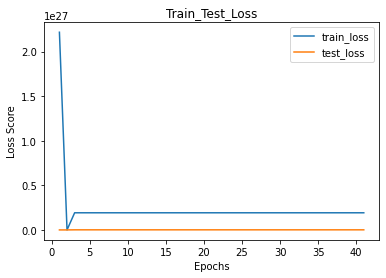

42
Train Epoch: 42 [0/7471 (0%)]	Loss: 63016.714844
Train Epoch: 42 [160/7471 (2%)]	Loss: 1403606991961036748226560.000000
Train Epoch: 42 [320/7471 (4%)]	Loss: 737113734671736124735488.000000
Train Epoch: 42 [480/7471 (6%)]	Loss: 1472167149568.000000
Train Epoch: 42 [640/7471 (9%)]	Loss: 66282.601562
Train Epoch: 42 [800/7471 (11%)]	Loss: 68149.171875
Train Epoch: 42 [960/7471 (13%)]	Loss: 68838.328125
Train Epoch: 42 [1120/7471 (15%)]	Loss: 777372631040.000000
Train Epoch: 42 [1280/7471 (17%)]	Loss: 68960.734375
Train Epoch: 42 [1440/7471 (19%)]	Loss: 66522.562500
Train Epoch: 42 [1600/7471 (21%)]	Loss: 66612.304688
Train Epoch: 42 [1760/7471 (24%)]	Loss: 68980.851562
Train Epoch: 42 [1920/7471 (26%)]	Loss: 64772.117188
Train Epoch: 42 [2080/7471 (28%)]	Loss: 256824049664.000000
Train Epoch: 42 [2240/7471 (30%)]	Loss: 72289.671875
Train Epoch: 42 [2400/7471 (32%)]	Loss: 65476.367188
Train Epoch: 42 [2560/7471 (34%)]	Loss: 65042.406250
Train Epoch: 42 [2720/7471 (36%)]	Loss: 66581.835

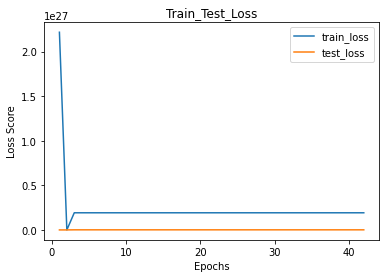

43
Train Epoch: 43 [0/7471 (0%)]	Loss: 1391205303566357047017472.000000
Train Epoch: 43 [160/7471 (2%)]	Loss: 65634.835938
Train Epoch: 43 [320/7471 (4%)]	Loss: 64014.289062
Train Epoch: 43 [480/7471 (6%)]	Loss: 66395.976562
Train Epoch: 43 [640/7471 (9%)]	Loss: 65944.125000
Train Epoch: 43 [800/7471 (11%)]	Loss: 66059.742188
Train Epoch: 43 [960/7471 (13%)]	Loss: 67010.234375
Train Epoch: 43 [1120/7471 (15%)]	Loss: 65930.734375
Train Epoch: 43 [1280/7471 (17%)]	Loss: 64210.707031
Train Epoch: 43 [1440/7471 (19%)]	Loss: 5152598165518516175765504.000000
Train Epoch: 43 [1600/7471 (21%)]	Loss: 69154.718750
Train Epoch: 43 [1760/7471 (24%)]	Loss: 65563.773438
Train Epoch: 43 [1920/7471 (26%)]	Loss: 65539.734375
Train Epoch: 43 [2080/7471 (28%)]	Loss: 66036.296875
Train Epoch: 43 [2240/7471 (30%)]	Loss: 66442.125000
Train Epoch: 43 [2400/7471 (32%)]	Loss: 2362166395247876095606784.000000
Train Epoch: 43 [2560/7471 (34%)]	Loss: 66922.531250
Train Epoch: 43 [2720/7471 (36%)]	Loss: 68210.8281

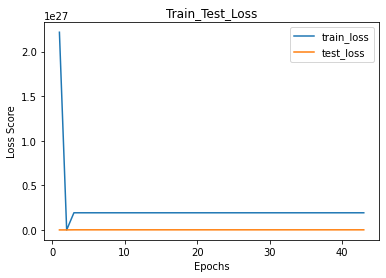

44
Train Epoch: 44 [0/7471 (0%)]	Loss: 67834.796875
Train Epoch: 44 [160/7471 (2%)]	Loss: 67050.015625
Train Epoch: 44 [320/7471 (4%)]	Loss: 52720992721045502820352.000000
Train Epoch: 44 [480/7471 (6%)]	Loss: 65663.226562
Train Epoch: 44 [640/7471 (9%)]	Loss: 66954.984375
Train Epoch: 44 [800/7471 (11%)]	Loss: 67664.382812
Train Epoch: 44 [960/7471 (13%)]	Loss: 647807498176167264911360.000000
Train Epoch: 44 [1120/7471 (15%)]	Loss: 66533.375000
Train Epoch: 44 [1280/7471 (17%)]	Loss: 65814.359375
Train Epoch: 44 [1440/7471 (19%)]	Loss: 65578.546875
Train Epoch: 44 [1600/7471 (21%)]	Loss: 1419871.000000
Train Epoch: 44 [1760/7471 (24%)]	Loss: 485403.687500
Train Epoch: 44 [1920/7471 (26%)]	Loss: 131681.765625
Train Epoch: 44 [2080/7471 (28%)]	Loss: 14317858923315840772210688.000000
Train Epoch: 44 [2240/7471 (30%)]	Loss: 214946.812500
Train Epoch: 44 [2400/7471 (32%)]	Loss: 4797403226075477242281984.000000
Train Epoch: 44 [2560/7471 (34%)]	Loss: 76661.117188
Train Epoch: 44 [2720/7471 

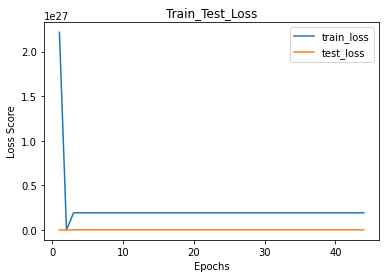

45
Train Epoch: 45 [0/7471 (0%)]	Loss: 85457.984375
Train Epoch: 45 [160/7471 (2%)]	Loss: 73189.992188
Train Epoch: 45 [320/7471 (4%)]	Loss: 84614.015625
Train Epoch: 45 [480/7471 (6%)]	Loss: 71102.414062
Train Epoch: 45 [640/7471 (9%)]	Loss: 71812.929688
Train Epoch: 45 [800/7471 (11%)]	Loss: 1252791744676346260881408.000000
Train Epoch: 45 [960/7471 (13%)]	Loss: 63417.421875
Train Epoch: 45 [1120/7471 (15%)]	Loss: 67974.484375
Train Epoch: 45 [1280/7471 (17%)]	Loss: 68540.234375
Train Epoch: 45 [1440/7471 (19%)]	Loss: 67397.156250
Train Epoch: 45 [1600/7471 (21%)]	Loss: 68074.242188
Train Epoch: 45 [1760/7471 (24%)]	Loss: 68570.343750
Train Epoch: 45 [1920/7471 (26%)]	Loss: 68502.312500
Train Epoch: 45 [2080/7471 (28%)]	Loss: 67037.343750
Train Epoch: 45 [2240/7471 (30%)]	Loss: 68579.921875
Train Epoch: 45 [2400/7471 (32%)]	Loss: 66729.265625
Train Epoch: 45 [2560/7471 (34%)]	Loss: 64862.023438
Train Epoch: 45 [2720/7471 (36%)]	Loss: 63993.078125
Train Epoch: 45 [2880/7471 (39%)]	Los

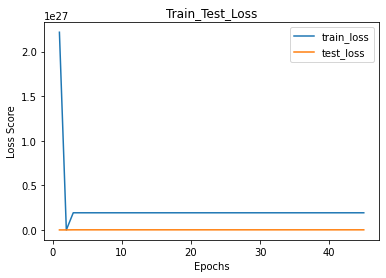

46
Train Epoch: 46 [0/7471 (0%)]	Loss: 67418.289062
Train Epoch: 46 [160/7471 (2%)]	Loss: 66120.875000
Train Epoch: 46 [320/7471 (4%)]	Loss: 66853.406250
Train Epoch: 46 [480/7471 (6%)]	Loss: 65485.789062
Train Epoch: 46 [640/7471 (9%)]	Loss: 73816.507812
Train Epoch: 46 [800/7471 (11%)]	Loss: 67387.789062
Train Epoch: 46 [960/7471 (13%)]	Loss: 63872.039062
Train Epoch: 46 [1120/7471 (15%)]	Loss: 10904531045991855683534848.000000
Train Epoch: 46 [1280/7471 (17%)]	Loss: 66222.718750
Train Epoch: 46 [1440/7471 (19%)]	Loss: 3680277340113287499481088.000000
Train Epoch: 46 [1600/7471 (21%)]	Loss: 67526.640625
Train Epoch: 46 [1760/7471 (24%)]	Loss: 64948.960938
Train Epoch: 46 [1920/7471 (26%)]	Loss: 64596.515625
Train Epoch: 46 [2080/7471 (28%)]	Loss: 79873.781250
Train Epoch: 46 [2240/7471 (30%)]	Loss: 72293.234375
Train Epoch: 46 [2400/7471 (32%)]	Loss: 69624.234375
Train Epoch: 46 [2560/7471 (34%)]	Loss: 72001.781250
Train Epoch: 46 [2720/7471 (36%)]	Loss: 695918264045064647868416.0000

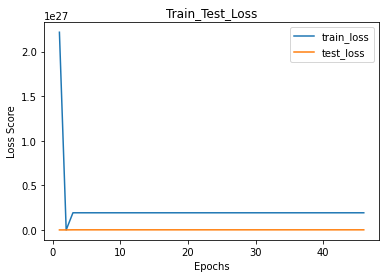

47
Train Epoch: 47 [0/7471 (0%)]	Loss: 62002.195312
Train Epoch: 47 [160/7471 (2%)]	Loss: 65950.679688
Train Epoch: 47 [320/7471 (4%)]	Loss: 65574.476562
Train Epoch: 47 [480/7471 (6%)]	Loss: 64436.523438
Train Epoch: 47 [640/7471 (9%)]	Loss: 65266.878906
Train Epoch: 47 [800/7471 (11%)]	Loss: 65033.894531
Train Epoch: 47 [960/7471 (13%)]	Loss: 5152598741979268479188992.000000
Train Epoch: 47 [1120/7471 (15%)]	Loss: 127744.625000
Train Epoch: 47 [1280/7471 (17%)]	Loss: 78590.773438
Train Epoch: 47 [1440/7471 (19%)]	Loss: 233537044480.000000
Train Epoch: 47 [1600/7471 (21%)]	Loss: 73121.945312
Train Epoch: 47 [1760/7471 (24%)]	Loss: 69762.203125
Train Epoch: 47 [1920/7471 (26%)]	Loss: 4016011541019315159433216.000000
Train Epoch: 47 [2080/7471 (28%)]	Loss: 42212090688555955781632.000000
Train Epoch: 47 [2240/7471 (30%)]	Loss: 66133.078125
Train Epoch: 47 [2400/7471 (32%)]	Loss: 983221796864.000000
Train Epoch: 47 [2560/7471 (34%)]	Loss: 64670.941406
Train Epoch: 47 [2720/7471 (36%)]	Los

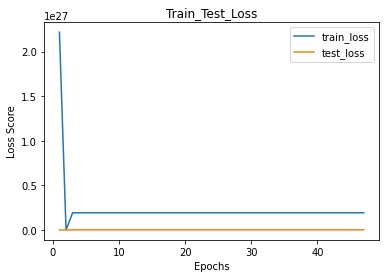

48
Train Epoch: 48 [0/7471 (0%)]	Loss: 63807.652344
Train Epoch: 48 [160/7471 (2%)]	Loss: 63319.367188
Train Epoch: 48 [320/7471 (4%)]	Loss: 64194.492188
Train Epoch: 48 [480/7471 (6%)]	Loss: 65658.804688
Train Epoch: 48 [640/7471 (9%)]	Loss: 4809639470234245860950016.000000
Train Epoch: 48 [800/7471 (11%)]	Loss: 62579.773438
Train Epoch: 48 [960/7471 (13%)]	Loss: 62818.664062
Train Epoch: 48 [1120/7471 (15%)]	Loss: 60583.281250
Train Epoch: 48 [1280/7471 (17%)]	Loss: 62905.773438
Train Epoch: 48 [1440/7471 (19%)]	Loss: 63936.417969
Train Epoch: 48 [1600/7471 (21%)]	Loss: 66066.539062
Train Epoch: 48 [1760/7471 (24%)]	Loss: 68039.468750
Train Epoch: 48 [1920/7471 (26%)]	Loss: 64604.011719
Train Epoch: 48 [2080/7471 (28%)]	Loss: 63207.136719
Train Epoch: 48 [2240/7471 (30%)]	Loss: 68220.984375
Train Epoch: 48 [2400/7471 (32%)]	Loss: 71567.437500
Train Epoch: 48 [2560/7471 (34%)]	Loss: 66138.453125
Train Epoch: 48 [2720/7471 (36%)]	Loss: 132627.031250
Train Epoch: 48 [2880/7471 (39%)]	Lo

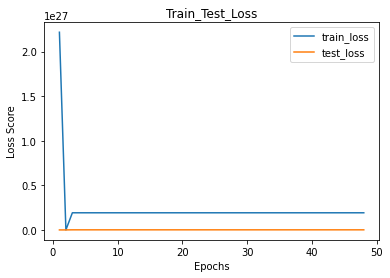

49
Train Epoch: 49 [0/7471 (0%)]	Loss: 81663.062500
Train Epoch: 49 [160/7471 (2%)]	Loss: 66335.546875
Train Epoch: 49 [320/7471 (4%)]	Loss: 66047.546875
Train Epoch: 49 [480/7471 (6%)]	Loss: 65399.906250
Train Epoch: 49 [640/7471 (9%)]	Loss: 63096.875000
Train Epoch: 49 [800/7471 (11%)]	Loss: 69321.757812
Train Epoch: 49 [960/7471 (13%)]	Loss: 70186.046875
Train Epoch: 49 [1120/7471 (15%)]	Loss: 65902.531250
Train Epoch: 49 [1280/7471 (17%)]	Loss: 70483.335938
Train Epoch: 49 [1440/7471 (19%)]	Loss: 84304.023438
Train Epoch: 49 [1600/7471 (21%)]	Loss: 65670.765625
Train Epoch: 49 [1760/7471 (24%)]	Loss: 65005.117188
Train Epoch: 49 [1920/7471 (26%)]	Loss: 7933764594707374014464.000000
Train Epoch: 49 [2080/7471 (28%)]	Loss: 62912.386719
Train Epoch: 49 [2240/7471 (30%)]	Loss: 67581.031250
Train Epoch: 49 [2400/7471 (32%)]	Loss: 64836.019531
Train Epoch: 49 [2560/7471 (34%)]	Loss: 62731.261719
Train Epoch: 49 [2720/7471 (36%)]	Loss: 64019.058594
Train Epoch: 49 [2880/7471 (39%)]	Loss: 

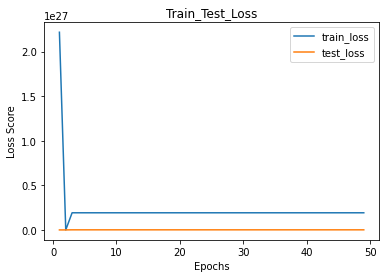

50
Train Epoch: 50 [0/7471 (0%)]	Loss: 137778.875000
Train Epoch: 50 [160/7471 (2%)]	Loss: 284026139798771819610112.000000
Train Epoch: 50 [320/7471 (4%)]	Loss: 74833.734375
Train Epoch: 50 [480/7471 (6%)]	Loss: 81228.156250
Train Epoch: 50 [640/7471 (9%)]	Loss: 416274468957296001024.000000
Train Epoch: 50 [800/7471 (11%)]	Loss: 79086.765625
Train Epoch: 50 [960/7471 (13%)]	Loss: 65894.445312
Train Epoch: 50 [1120/7471 (15%)]	Loss: 67891.523438
Train Epoch: 50 [1280/7471 (17%)]	Loss: 67652.265625
Train Epoch: 50 [1440/7471 (19%)]	Loss: 64597.910156
Train Epoch: 50 [1600/7471 (21%)]	Loss: 64066.929688
Train Epoch: 50 [1760/7471 (24%)]	Loss: 66187.515625
Train Epoch: 50 [1920/7471 (26%)]	Loss: 65022.566406
Train Epoch: 50 [2080/7471 (28%)]	Loss: 61272.835938
Train Epoch: 50 [2240/7471 (30%)]	Loss: 1934697282534929072128.000000
Train Epoch: 50 [2400/7471 (32%)]	Loss: 65096.132812
Train Epoch: 50 [2560/7471 (34%)]	Loss: 64188.343750
Train Epoch: 50 [2720/7471 (36%)]	Loss: 64282.140625
Trai

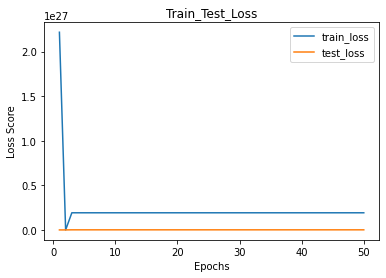

51
Train Epoch: 51 [0/7471 (0%)]	Loss: 66634.484375
Train Epoch: 51 [160/7471 (2%)]	Loss: 89522741996993815112883109888.000000
Train Epoch: 51 [320/7471 (4%)]	Loss: 69062.578125
Train Epoch: 51 [480/7471 (6%)]	Loss: 63447.921875
Train Epoch: 51 [640/7471 (9%)]	Loss: 68139.234375
Train Epoch: 51 [800/7471 (11%)]	Loss: 103744.226562
Train Epoch: 51 [960/7471 (13%)]	Loss: 83966.375000
Train Epoch: 51 [1120/7471 (15%)]	Loss: 67308.890625
Train Epoch: 51 [1280/7471 (17%)]	Loss: 73960.234375
Train Epoch: 51 [1440/7471 (19%)]	Loss: 65623.929688
Train Epoch: 51 [1600/7471 (21%)]	Loss: 69945.500000
Train Epoch: 51 [1760/7471 (24%)]	Loss: 2827510590549924734042112.000000
Train Epoch: 51 [1920/7471 (26%)]	Loss: 75713.890625
Train Epoch: 51 [2080/7471 (28%)]	Loss: 69598.218750
Train Epoch: 51 [2240/7471 (30%)]	Loss: 66749.078125
Train Epoch: 51 [2400/7471 (32%)]	Loss: 145847.343750
Train Epoch: 51 [2560/7471 (34%)]	Loss: 94749.093750
Train Epoch: 51 [2720/7471 (36%)]	Loss: 77763.546875
Train Epoch

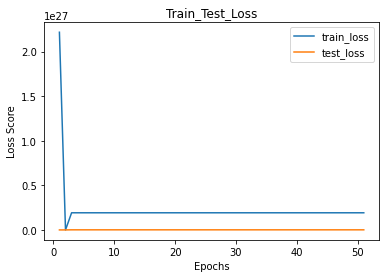

52
Train Epoch: 52 [0/7471 (0%)]	Loss: 70937.804688
Train Epoch: 52 [160/7471 (2%)]	Loss: 695918264045064647868416.000000
Train Epoch: 52 [320/7471 (4%)]	Loss: 66432.976562
Train Epoch: 52 [480/7471 (6%)]	Loss: 63273.734375
Train Epoch: 52 [640/7471 (9%)]	Loss: 63229.632812
Train Epoch: 52 [800/7471 (11%)]	Loss: 1943642918708663816290304.000000
Train Epoch: 52 [960/7471 (13%)]	Loss: 64605.527344
Train Epoch: 52 [1120/7471 (15%)]	Loss: 65743.046875
Train Epoch: 52 [1280/7471 (17%)]	Loss: 69813.570312
Train Epoch: 52 [1440/7471 (19%)]	Loss: 66519.875000
Train Epoch: 52 [1600/7471 (21%)]	Loss: 66614.578125
Train Epoch: 52 [1760/7471 (24%)]	Loss: 2917684328420116208287744.000000
Train Epoch: 52 [1920/7471 (26%)]	Loss: 67417.453125
Train Epoch: 52 [2080/7471 (28%)]	Loss: 125832.406250
Train Epoch: 52 [2240/7471 (30%)]	Loss: 254516.234375
Train Epoch: 52 [2400/7471 (32%)]	Loss: 158176.281250
Train Epoch: 52 [2560/7471 (34%)]	Loss: 312899.562500
Train Epoch: 52 [2720/7471 (36%)]	Loss: 100529.

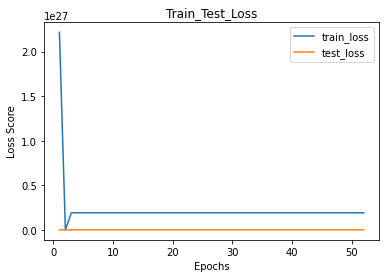

53
Train Epoch: 53 [0/7471 (0%)]	Loss: 66114.203125
Train Epoch: 53 [160/7471 (2%)]	Loss: 61699.578125
Train Epoch: 53 [320/7471 (4%)]	Loss: 67177.898438
Train Epoch: 53 [480/7471 (6%)]	Loss: 408229773385417097216.000000
Train Epoch: 53 [640/7471 (9%)]	Loss: 66515.976562
Train Epoch: 53 [800/7471 (11%)]	Loss: 64236.152344
Train Epoch: 53 [960/7471 (13%)]	Loss: 64570.480469
Train Epoch: 53 [1120/7471 (15%)]	Loss: 62408.734375
Train Epoch: 53 [1280/7471 (17%)]	Loss: 3680277051882911347769344.000000
Train Epoch: 53 [1440/7471 (19%)]	Loss: 66544.093750
Train Epoch: 53 [1600/7471 (21%)]	Loss: 65377.464844
Train Epoch: 53 [1760/7471 (24%)]	Loss: 1960493587074433264123904.000000
Train Epoch: 53 [1920/7471 (26%)]	Loss: 63389.492188
Train Epoch: 53 [2080/7471 (28%)]	Loss: 66798.531250
Train Epoch: 53 [2240/7471 (30%)]	Loss: 65075.796875
Train Epoch: 53 [2400/7471 (32%)]	Loss: 64693.046875
Train Epoch: 53 [2560/7471 (34%)]	Loss: 64627.917969
Train Epoch: 53 [2720/7471 (36%)]	Loss: 63898.640625
T

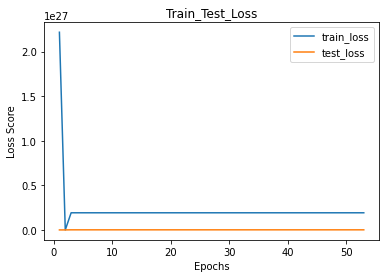

54
Train Epoch: 54 [0/7471 (0%)]	Loss: 70365.234375
Train Epoch: 54 [160/7471 (2%)]	Loss: 63085.187500
Train Epoch: 54 [320/7471 (4%)]	Loss: 65852.093750
Train Epoch: 54 [480/7471 (6%)]	Loss: 65022.531250
Train Epoch: 54 [640/7471 (9%)]	Loss: 65233.414062
Train Epoch: 54 [800/7471 (11%)]	Loss: 65370.000000
Train Epoch: 54 [960/7471 (13%)]	Loss: 62905.921875
Train Epoch: 54 [1120/7471 (15%)]	Loss: 1252791600561158185025536.000000
Train Epoch: 54 [1280/7471 (17%)]	Loss: 67674.843750
Train Epoch: 54 [1440/7471 (19%)]	Loss: 67316.101562
Train Epoch: 54 [1600/7471 (21%)]	Loss: 889610.000000
Train Epoch: 54 [1760/7471 (24%)]	Loss: 336767.812500
Train Epoch: 54 [1920/7471 (26%)]	Loss: 42249038219898903330816.000000
Train Epoch: 54 [2080/7471 (28%)]	Loss: 157133.218750
Train Epoch: 54 [2240/7471 (30%)]	Loss: 109311.406250
Train Epoch: 54 [2400/7471 (32%)]	Loss: 80685.984375
Train Epoch: 54 [2560/7471 (34%)]	Loss: 149113.218750
Train Epoch: 54 [2720/7471 (36%)]	Loss: 88866.757812
Train Epoch: 5

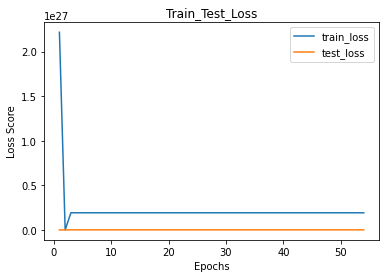

55
Train Epoch: 55 [0/7471 (0%)]	Loss: 74059.171875
Train Epoch: 55 [160/7471 (2%)]	Loss: 69358.296875
Train Epoch: 55 [320/7471 (4%)]	Loss: 4655267633496428904448.000000
Train Epoch: 55 [480/7471 (6%)]	Loss: 64626.371094
Train Epoch: 55 [640/7471 (9%)]	Loss: 63474.511719
Train Epoch: 55 [800/7471 (11%)]	Loss: 62237.343750
Train Epoch: 55 [960/7471 (13%)]	Loss: 64630.078125
Train Epoch: 55 [1120/7471 (15%)]	Loss: 62750.742188
Train Epoch: 55 [1280/7471 (17%)]	Loss: 65006.742188
Train Epoch: 55 [1440/7471 (19%)]	Loss: 64558.945312
Train Epoch: 55 [1600/7471 (21%)]	Loss: 65024.199219
Train Epoch: 55 [1760/7471 (24%)]	Loss: 61358.453125
Train Epoch: 55 [1920/7471 (26%)]	Loss: 58711.394531
Train Epoch: 55 [2080/7471 (28%)]	Loss: 64467.328125
Train Epoch: 55 [2240/7471 (30%)]	Loss: 58722.093750
Train Epoch: 55 [2400/7471 (32%)]	Loss: 60907.683594
Train Epoch: 55 [2560/7471 (34%)]	Loss: 63466.730469
Train Epoch: 55 [2720/7471 (36%)]	Loss: 58273.859375
Train Epoch: 55 [2880/7471 (39%)]	Loss: 

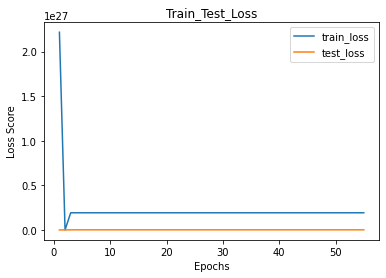

56
Train Epoch: 56 [0/7471 (0%)]	Loss: 61412.304688
Train Epoch: 56 [160/7471 (2%)]	Loss: 63071.671875
Train Epoch: 56 [320/7471 (4%)]	Loss: 62595.625000
Train Epoch: 56 [480/7471 (6%)]	Loss: 63951.753906
Train Epoch: 56 [640/7471 (9%)]	Loss: 4000564122239840320225280.000000
Train Epoch: 56 [800/7471 (11%)]	Loss: 64294.023438
Train Epoch: 56 [960/7471 (13%)]	Loss: 62489.945312
Train Epoch: 56 [1120/7471 (15%)]	Loss: 89743.023438
Train Epoch: 56 [1280/7471 (17%)]	Loss: 16158321.000000
Train Epoch: 56 [1440/7471 (19%)]	Loss: 65637.609375
Train Epoch: 56 [1600/7471 (21%)]	Loss: 135621197824.000000
Train Epoch: 56 [1760/7471 (24%)]	Loss: 60142.054688
Train Epoch: 56 [1920/7471 (26%)]	Loss: 61769.421875
Train Epoch: 56 [2080/7471 (28%)]	Loss: 262860.218750
Train Epoch: 56 [2240/7471 (30%)]	Loss: 143786.406250
Train Epoch: 56 [2400/7471 (32%)]	Loss: 76951.210938
Train Epoch: 56 [2560/7471 (34%)]	Loss: 69485.515625
Train Epoch: 56 [2720/7471 (36%)]	Loss: 68479.148438
Train Epoch: 56 [2880/747

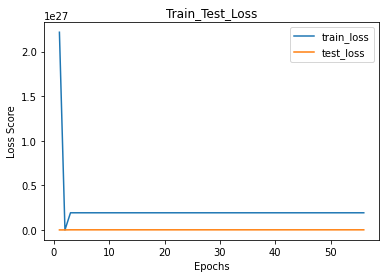

57
Train Epoch: 57 [0/7471 (0%)]	Loss: 65310.992188
Train Epoch: 57 [160/7471 (2%)]	Loss: 65071.183594
Train Epoch: 57 [320/7471 (4%)]	Loss: 65544.132812
Train Epoch: 57 [480/7471 (6%)]	Loss: 64605.742188
Train Epoch: 57 [640/7471 (9%)]	Loss: 61157.945312
Train Epoch: 57 [800/7471 (11%)]	Loss: 64083.890625
Train Epoch: 57 [960/7471 (13%)]	Loss: 64707.347656
Train Epoch: 57 [1120/7471 (15%)]	Loss: 62985.429688
Train Epoch: 57 [1280/7471 (17%)]	Loss: 65014.363281
Train Epoch: 57 [1440/7471 (19%)]	Loss: 62678.070312
Train Epoch: 57 [1600/7471 (21%)]	Loss: 15617487383540899812212736.000000
Train Epoch: 57 [1760/7471 (24%)]	Loss: 3450172208681471442944.000000
Train Epoch: 57 [1920/7471 (26%)]	Loss: 822573680912748467191808.000000
Train Epoch: 57 [2080/7471 (28%)]	Loss: 63601.296875
Train Epoch: 57 [2240/7471 (30%)]	Loss: 63968.328125
Train Epoch: 57 [2400/7471 (32%)]	Loss: 63299.679688
Train Epoch: 57 [2560/7471 (34%)]	Loss: 64520.902344
Train Epoch: 57 [2720/7471 (36%)]	Loss: 62030.531250


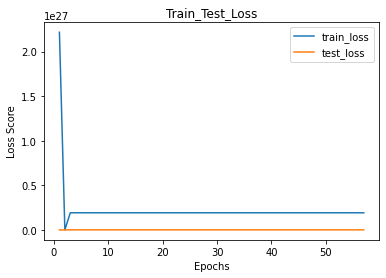

58
Train Epoch: 58 [0/7471 (0%)]	Loss: 61515.066406
Train Epoch: 58 [160/7471 (2%)]	Loss: 647807498176167264911360.000000
Train Epoch: 58 [320/7471 (4%)]	Loss: 62558.164062
Train Epoch: 58 [480/7471 (6%)]	Loss: 62021.882812
Train Epoch: 58 [640/7471 (9%)]	Loss: 10904531045991855683534848.000000
Train Epoch: 58 [800/7471 (11%)]	Loss: 64597.285156
Train Epoch: 58 [960/7471 (13%)]	Loss: 64267.714844
Train Epoch: 58 [1120/7471 (15%)]	Loss: 64592.914062
Train Epoch: 58 [1280/7471 (17%)]	Loss: 1104818088612541461692416.000000
Train Epoch: 58 [1440/7471 (19%)]	Loss: 63330.445312
Train Epoch: 58 [1600/7471 (21%)]	Loss: 60544.242188
Train Epoch: 58 [1760/7471 (24%)]	Loss: 61050.488281
Train Epoch: 58 [1920/7471 (26%)]	Loss: 64154.468750
Train Epoch: 58 [2080/7471 (28%)]	Loss: 66109.804688
Train Epoch: 58 [2240/7471 (30%)]	Loss: 62709.160156
Train Epoch: 58 [2400/7471 (32%)]	Loss: 64277.031250
Train Epoch: 58 [2560/7471 (34%)]	Loss: 62896.644531
Train Epoch: 58 [2720/7471 (36%)]	Loss: 64666.8046

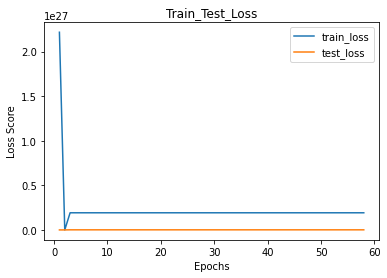

59
Train Epoch: 59 [0/7471 (0%)]	Loss: 850434173186761000222720.000000
Train Epoch: 59 [160/7471 (2%)]	Loss: 10714743832576.000000
Train Epoch: 59 [320/7471 (4%)]	Loss: 79127.476562
Train Epoch: 59 [480/7471 (6%)]	Loss: 71907.203125
Train Epoch: 59 [640/7471 (9%)]	Loss: 1174438436989028007936.000000
Train Epoch: 59 [800/7471 (11%)]	Loss: 66463.734375
Train Epoch: 59 [960/7471 (13%)]	Loss: 68780.148438
Train Epoch: 59 [1120/7471 (15%)]	Loss: 67440.210938
Train Epoch: 59 [1280/7471 (17%)]	Loss: 71704.320312
Train Epoch: 59 [1440/7471 (19%)]	Loss: 67196.179688
Train Epoch: 59 [1600/7471 (21%)]	Loss: 66895.828125
Train Epoch: 59 [1760/7471 (24%)]	Loss: 69361.179688
Train Epoch: 59 [1920/7471 (26%)]	Loss: 65855.398438
Train Epoch: 59 [2080/7471 (28%)]	Loss: 1074121913840354350596096.000000
Train Epoch: 59 [2240/7471 (30%)]	Loss: 69176.320312
Train Epoch: 59 [2400/7471 (32%)]	Loss: 69080.367188
Train Epoch: 59 [2560/7471 (34%)]	Loss: 66489.007812
Train Epoch: 59 [2720/7471 (36%)]	Loss: 68781

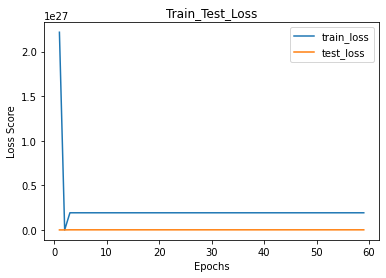

60
Train Epoch: 60 [0/7471 (0%)]	Loss: 67510.390625
Train Epoch: 60 [160/7471 (2%)]	Loss: 64269.789062
Train Epoch: 60 [320/7471 (4%)]	Loss: 5152598165518516175765504.000000
Train Epoch: 60 [480/7471 (6%)]	Loss: 84247.664062
Train Epoch: 60 [640/7471 (9%)]	Loss: 5551478453692613148016640.000000
Train Epoch: 60 [800/7471 (11%)]	Loss: 68080.734375
Train Epoch: 60 [960/7471 (13%)]	Loss: 68450.539062
Train Epoch: 60 [1120/7471 (15%)]	Loss: 64833.234375
Train Epoch: 60 [1280/7471 (17%)]	Loss: 68878.218750
Train Epoch: 60 [1440/7471 (19%)]	Loss: 63655.835938
Train Epoch: 60 [1600/7471 (21%)]	Loss: 62466.898438
Train Epoch: 60 [1760/7471 (24%)]	Loss: 61440.453125
Train Epoch: 60 [1920/7471 (26%)]	Loss: 67939.375000
Train Epoch: 60 [2080/7471 (28%)]	Loss: 66170.546875
Train Epoch: 60 [2240/7471 (30%)]	Loss: 1318982121177329952620544.000000
Train Epoch: 60 [2400/7471 (32%)]	Loss: 69853.835938
Train Epoch: 60 [2560/7471 (34%)]	Loss: 3680277340113287499481088.000000
Train Epoch: 60 [2720/7471 (36

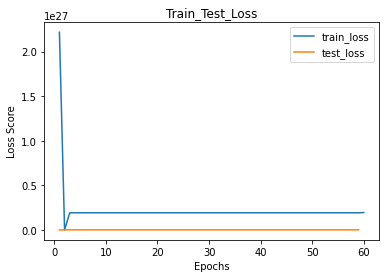

61
Train Epoch: 61 [0/7471 (0%)]	Loss: 33704403502741149880156160.000000
Train Epoch: 61 [160/7471 (2%)]	Loss: 5307012977855777315225600.000000


RuntimeError: ignored

In [19]:
epochs = 200

for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)

        plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss")
        plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./plot/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()

        with torch.no_grad():
            sample = torch.randn(64, 100).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 224, 224),
                       './results/sample_' + str(epoch) + '.png')